In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("./blog.mplstyle")

field definitions: https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv

focus on consumption? energy "use"? 
- what share of the energy we use comes from renewables?

In [3]:
df = pd.read_csv("../data/owid-energy-data.csv")
df = df[df["year"] >= 1970]

In [4]:
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [5]:
us_df = df[df["country"] == "United States"]

In [6]:
us_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
20439,United States,1970,USA,200328336.0,4.912636e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20440,United States,1971,USA,202907920.0,5.065682e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20441,United States,1972,USA,205238384.0,5.334297e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20442,United States,1973,USA,207314768.0,5.637203e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20443,United States,1974,USA,209277968.0,5.621366e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


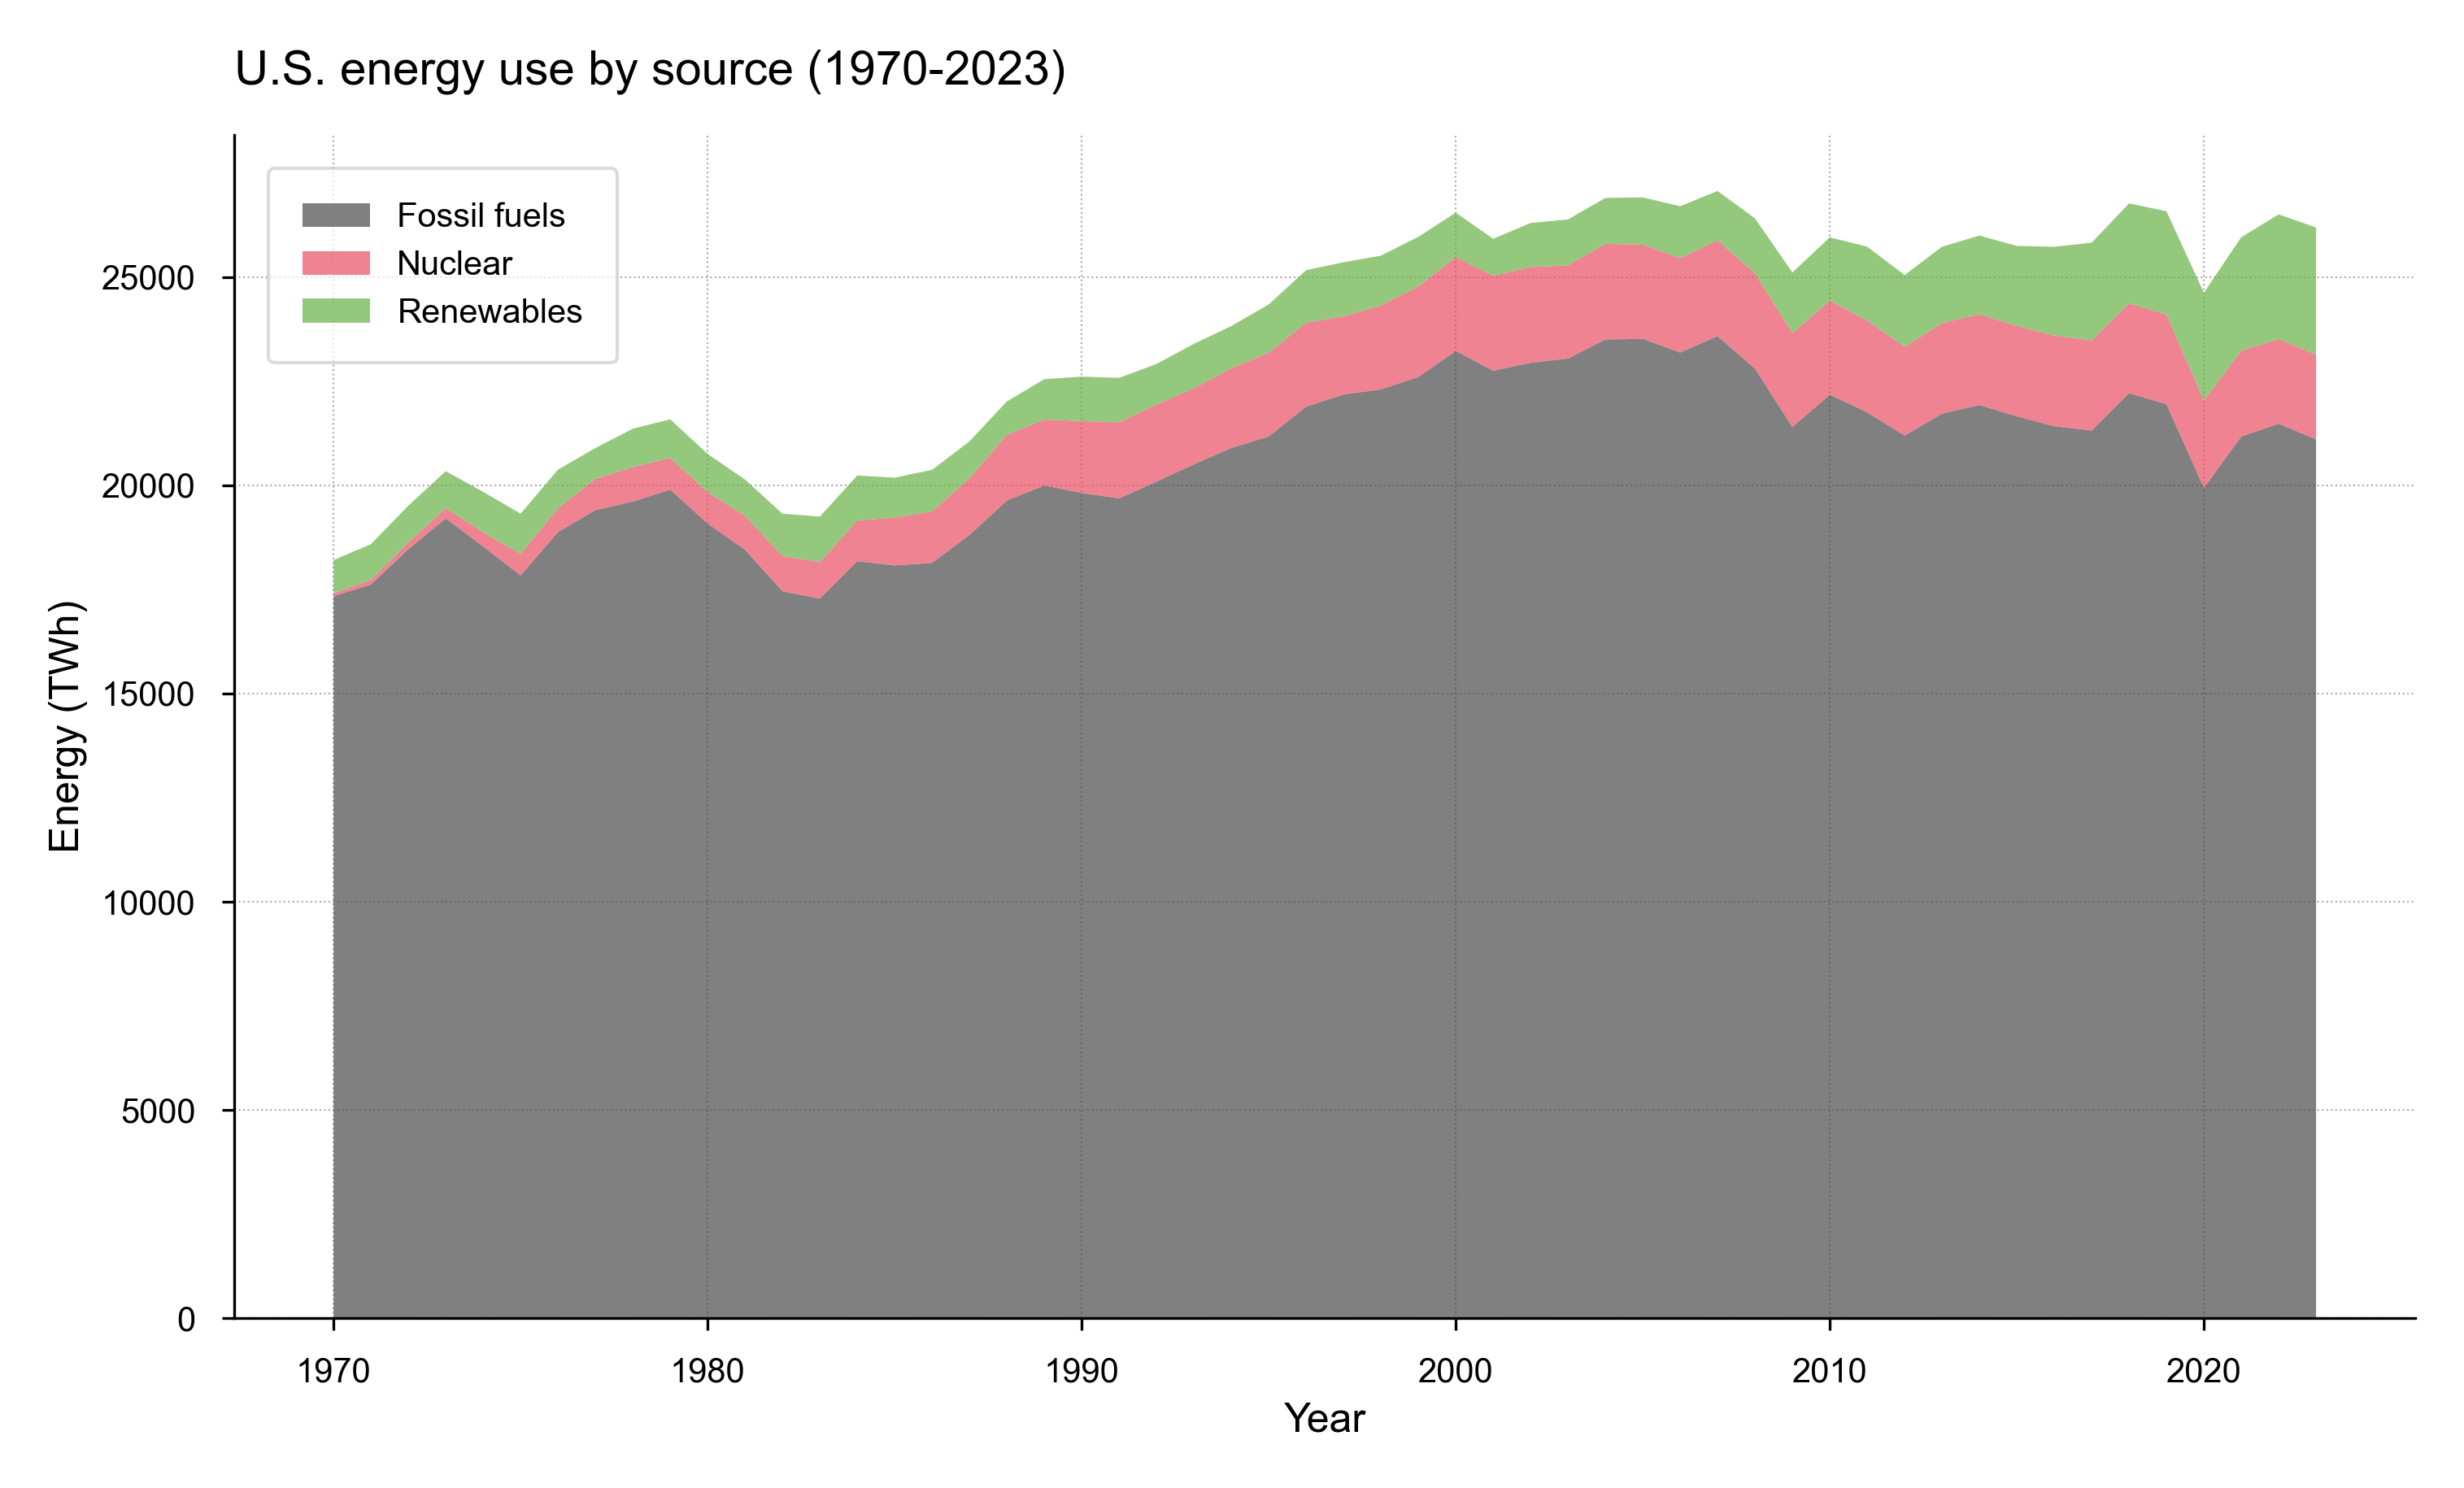

In [743]:
plt.figure(figsize=(10, 6))


# plt.plot(
#     us_df["year"],
#     us_df["primary_energy_consumption"],
#     # label="Total Energy Demand",
#     # color="blue",
#     linewidth=2,
# )
plt.stackplot(
    us_df["year"], 
    us_df["fossil_fuel_consumption"],
    us_df["nuclear_consumption"],
    us_df["renewables_consumption"],
    # us_df["coal_consumption"],
    labels=["Fossil fuels", "Nuclear", "Renewables"], 
    # colors=["skyblue", "lightcoral", "lightgreen"], 
    alpha=0.7
)
plt.xlabel("Year")
plt.ylabel("Energy (TWh)")
plt.title("U.S. energy use by source (1970-2023)", loc="left", fontweight="regular")
plt.legend(
    loc="upper left",
    frameon=True,
    # fancybox=True,
    # shadow=True,
    framealpha=0.7,
    borderpad=1,
)

plt.gca().set_axisbelow(True)
plt.savefig("../../joypauls.dev-astro/src/assets/blog/energy-use-in-us/energy_use.png")
plt.show()



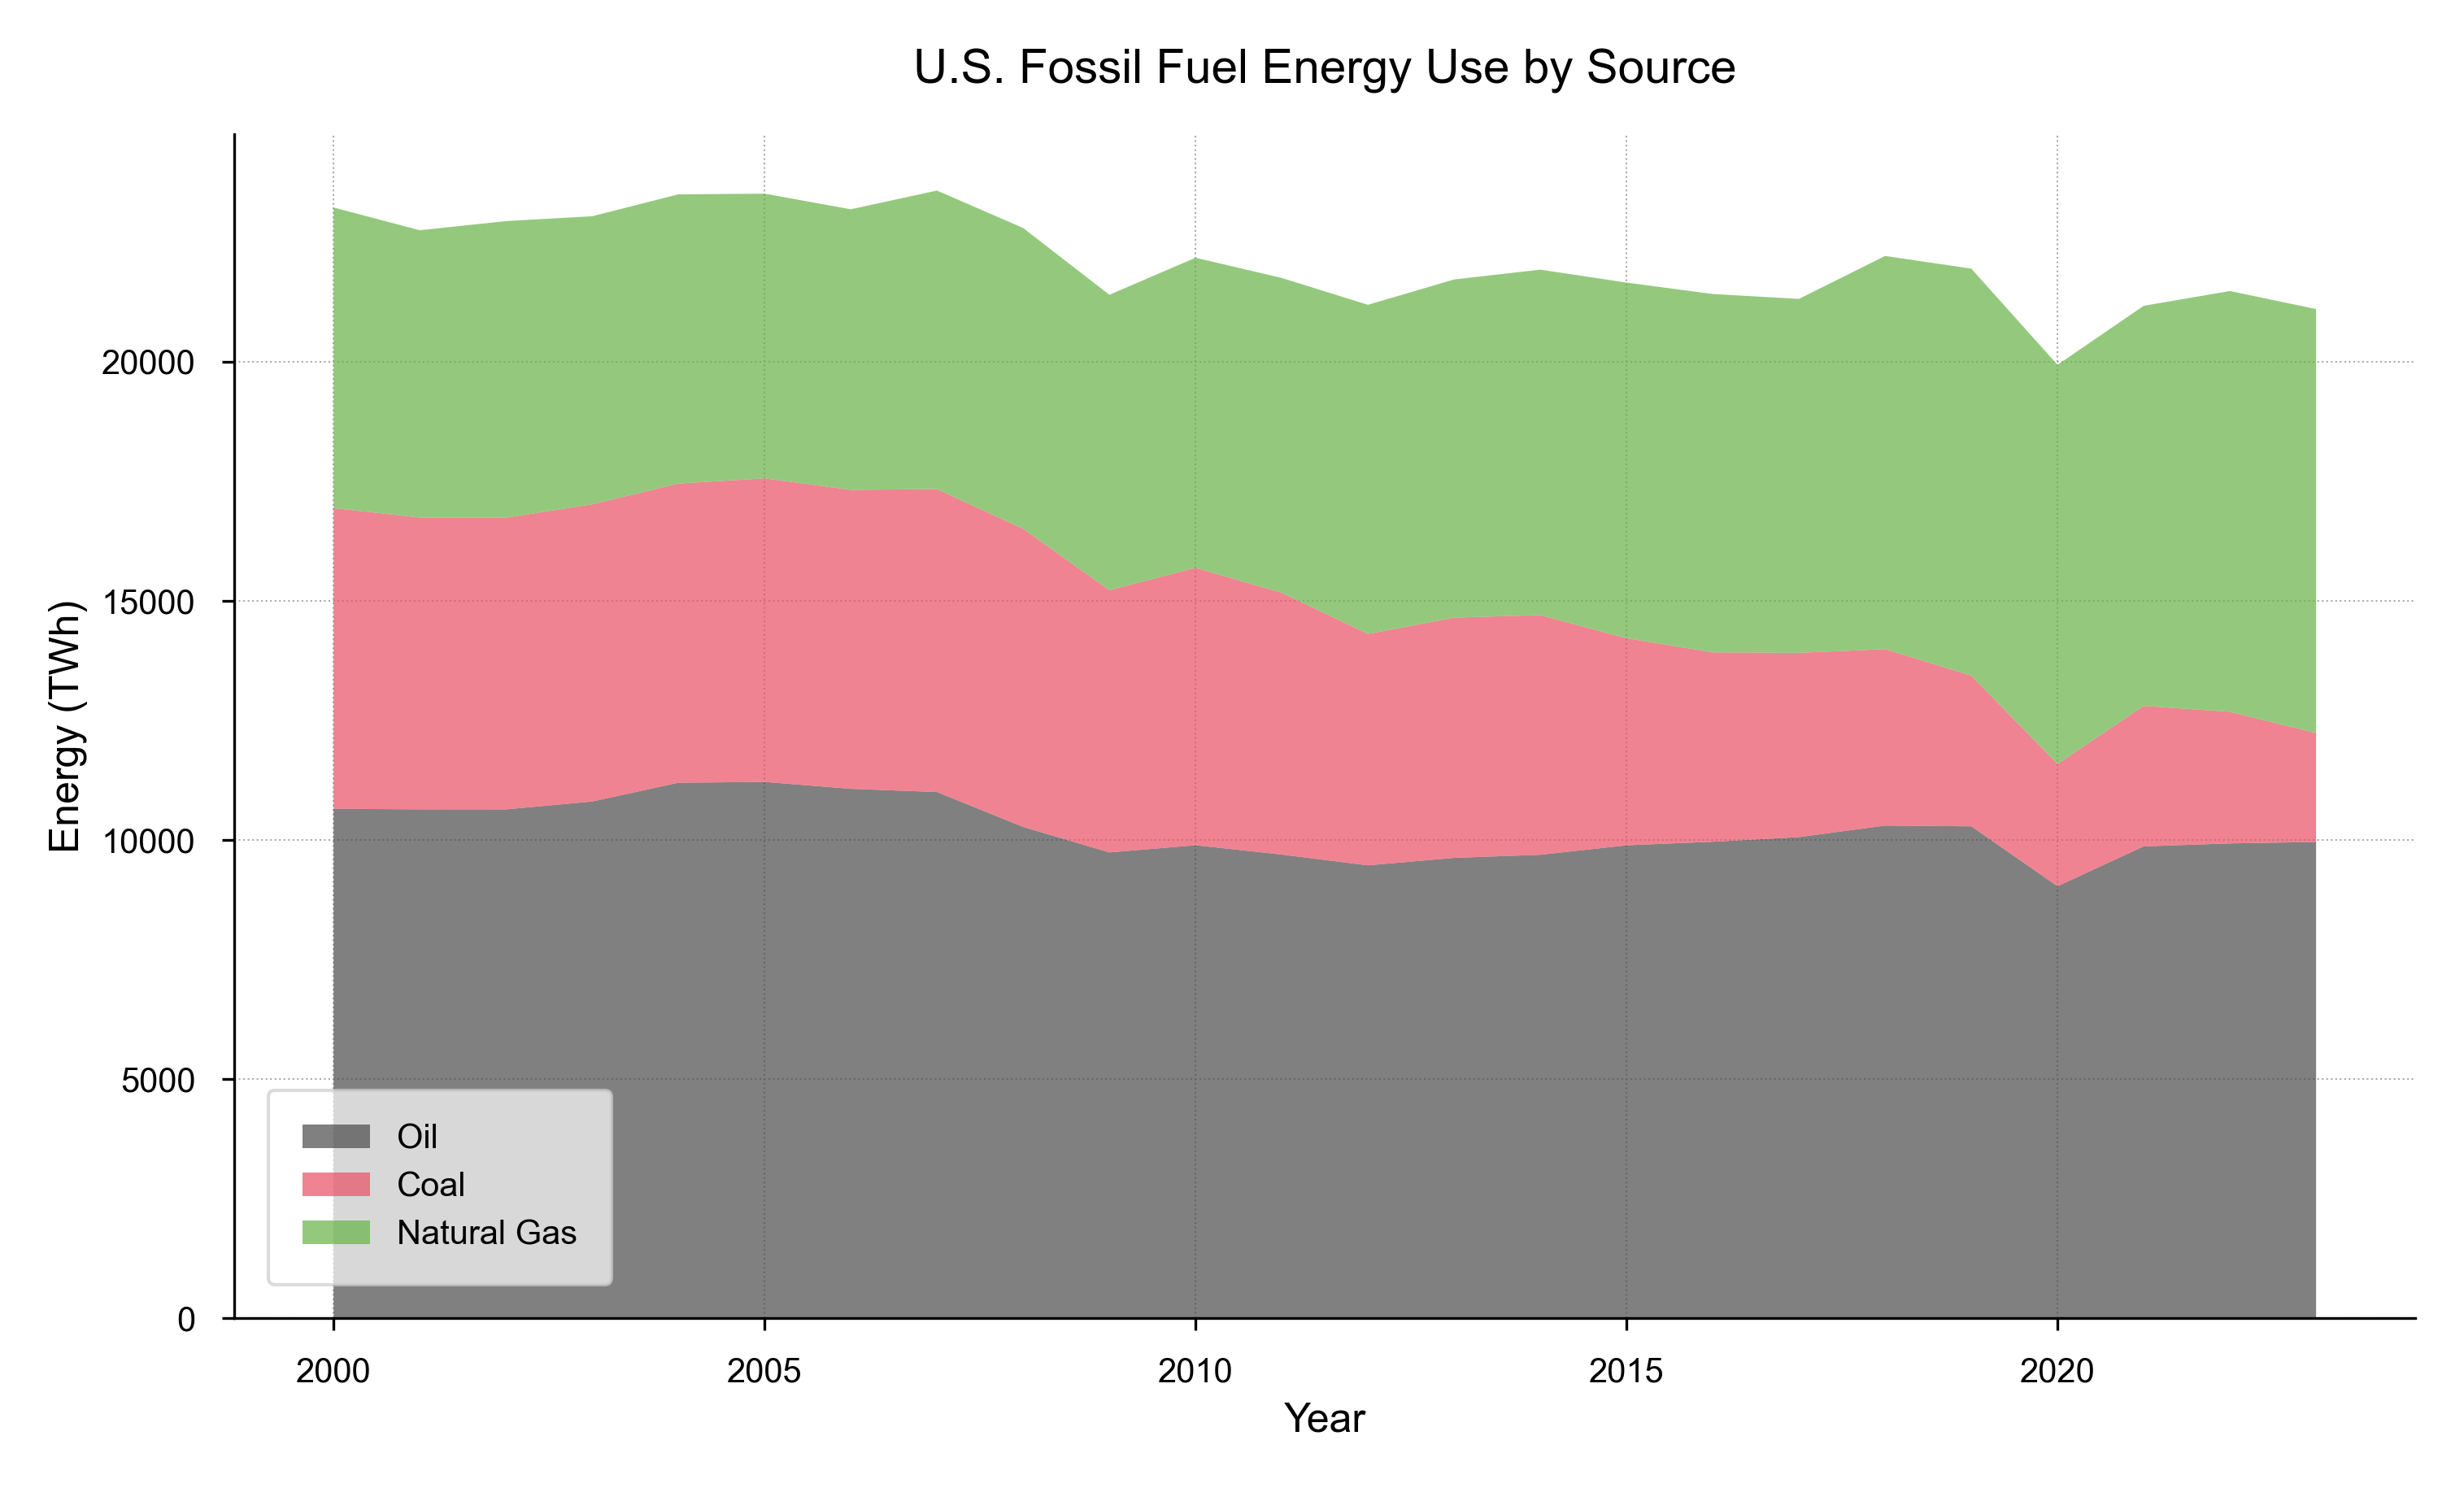

In [744]:
ff_us_df = us_df[us_df["year"] >= 2000]

plt.figure(figsize=(10, 6))

plt.stackplot(
    ff_us_df["year"], 
    ff_us_df["oil_consumption"],
    ff_us_df["coal_consumption"],
    ff_us_df["gas_consumption"],
    # us_df["coal_consumption"],
    labels=["Oil", "Coal", "Natural Gas"], 
    # colors=["skyblue', 'lightcoral', 'lightgreen'], 
    alpha=0.7
)
plt.xlabel("Year")
plt.ylabel("Energy (TWh)")
plt.title("U.S. Fossil Fuel Energy Use by Source")
plt.legend(
    loc="lower left",
    frameon=True,
    # fancybox=True,
    # shadow=True,
    framealpha=0.7,
    borderpad=1,
)

plt.gca().set_axisbelow(True)
plt.show()




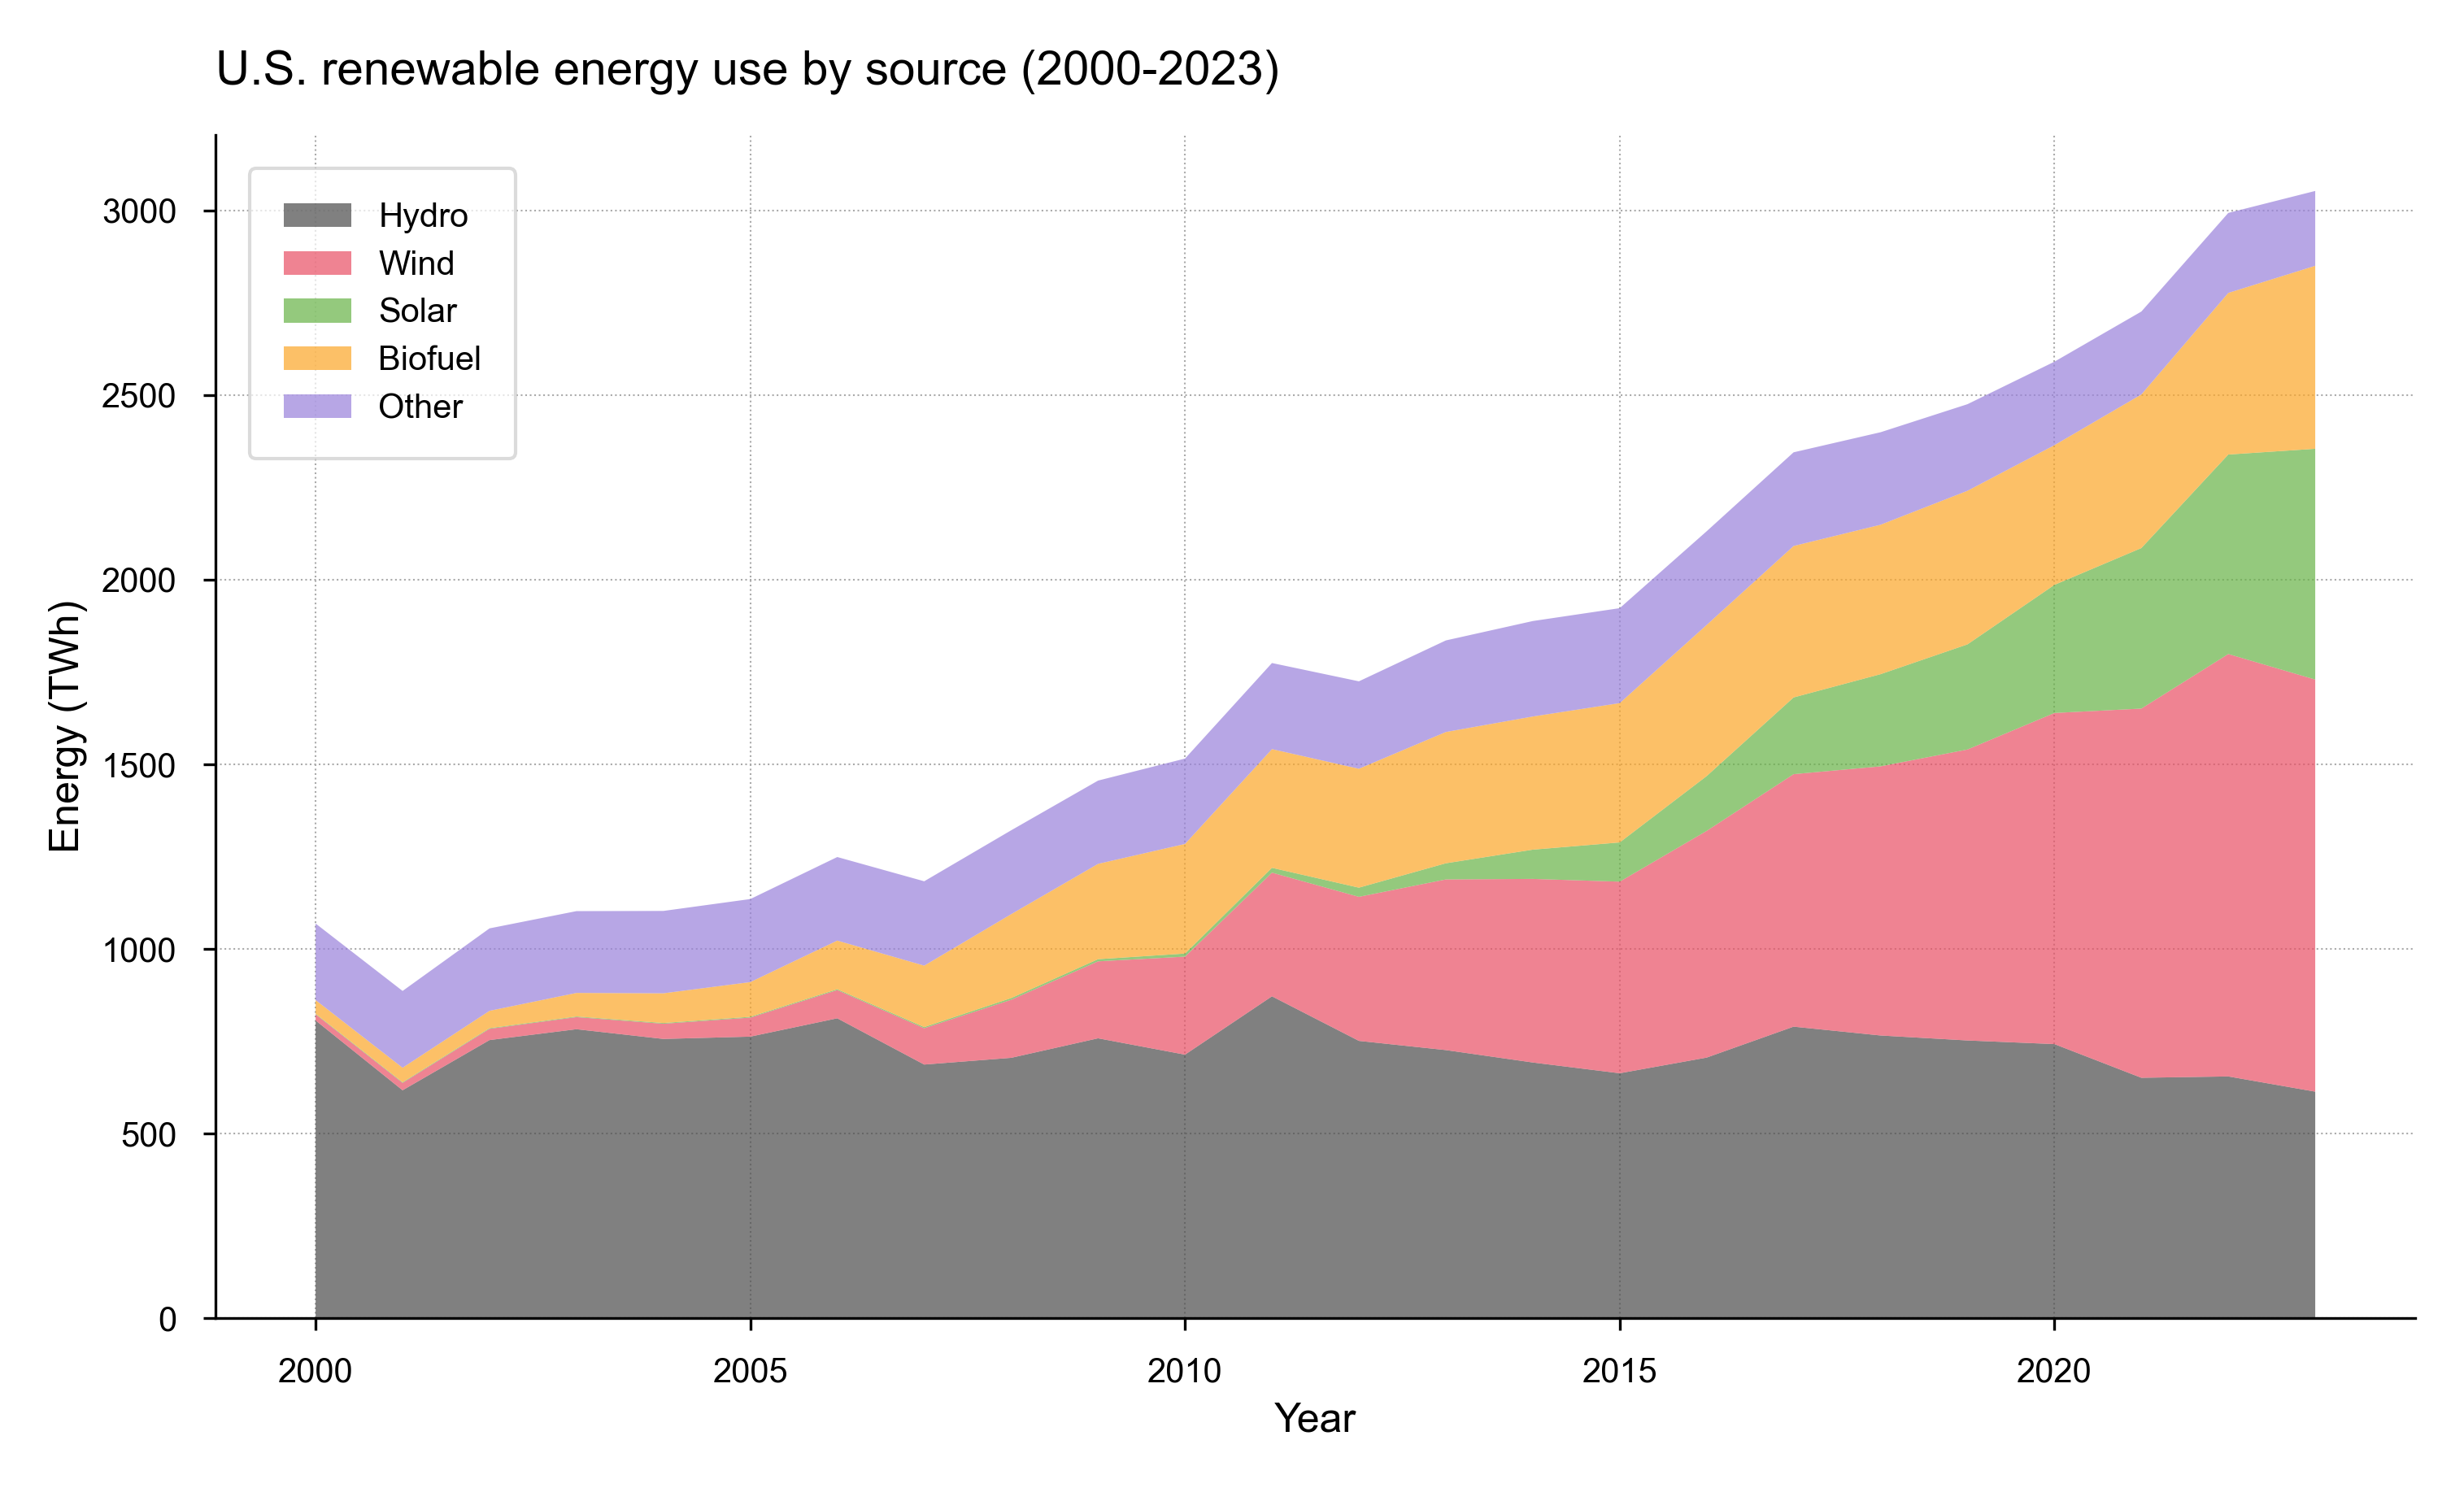

In [745]:
renewables_us_df = us_df[us_df["year"] >= 2000]

plt.figure(figsize=(10, 6))

# plt.plot(
#     renewables_us_df["year"],
#     renewables_us_df["renewables_consumption"],
#     # label="Total Energy Demand",
#     # color="blue",
#     linewidth=2,
# )
plt.stackplot(
    renewables_us_df["year"], 
    renewables_us_df["hydro_consumption"],
    renewables_us_df["wind_consumption"],
    renewables_us_df["solar_consumption"],
    renewables_us_df["biofuel_consumption"],
    renewables_us_df["other_renewable_consumption"],
    # us_df["coal_consumption"],
    labels=["Hydro", "Wind", "Solar", "Biofuel", "Other"], 
    # colors=['skyblue', 'lightcoral', 'lightgreen'], 
    alpha=0.7
)
plt.xlabel("Year")
plt.ylabel("Energy (TWh)")
plt.title("U.S. renewable energy use by source (2000-2023)", loc="left", fontweight="regular")
plt.legend(
    loc="upper left",
    frameon=True,
    # fancybox=True,
    # shadow=True,
    framealpha=0.7,
    borderpad=1,
)

plt.gca().set_axisbelow(True)
plt.savefig("../../joypauls.dev-astro/src/assets/blog/energy-use-in-us/renewable_energy_use.png")
plt.show()



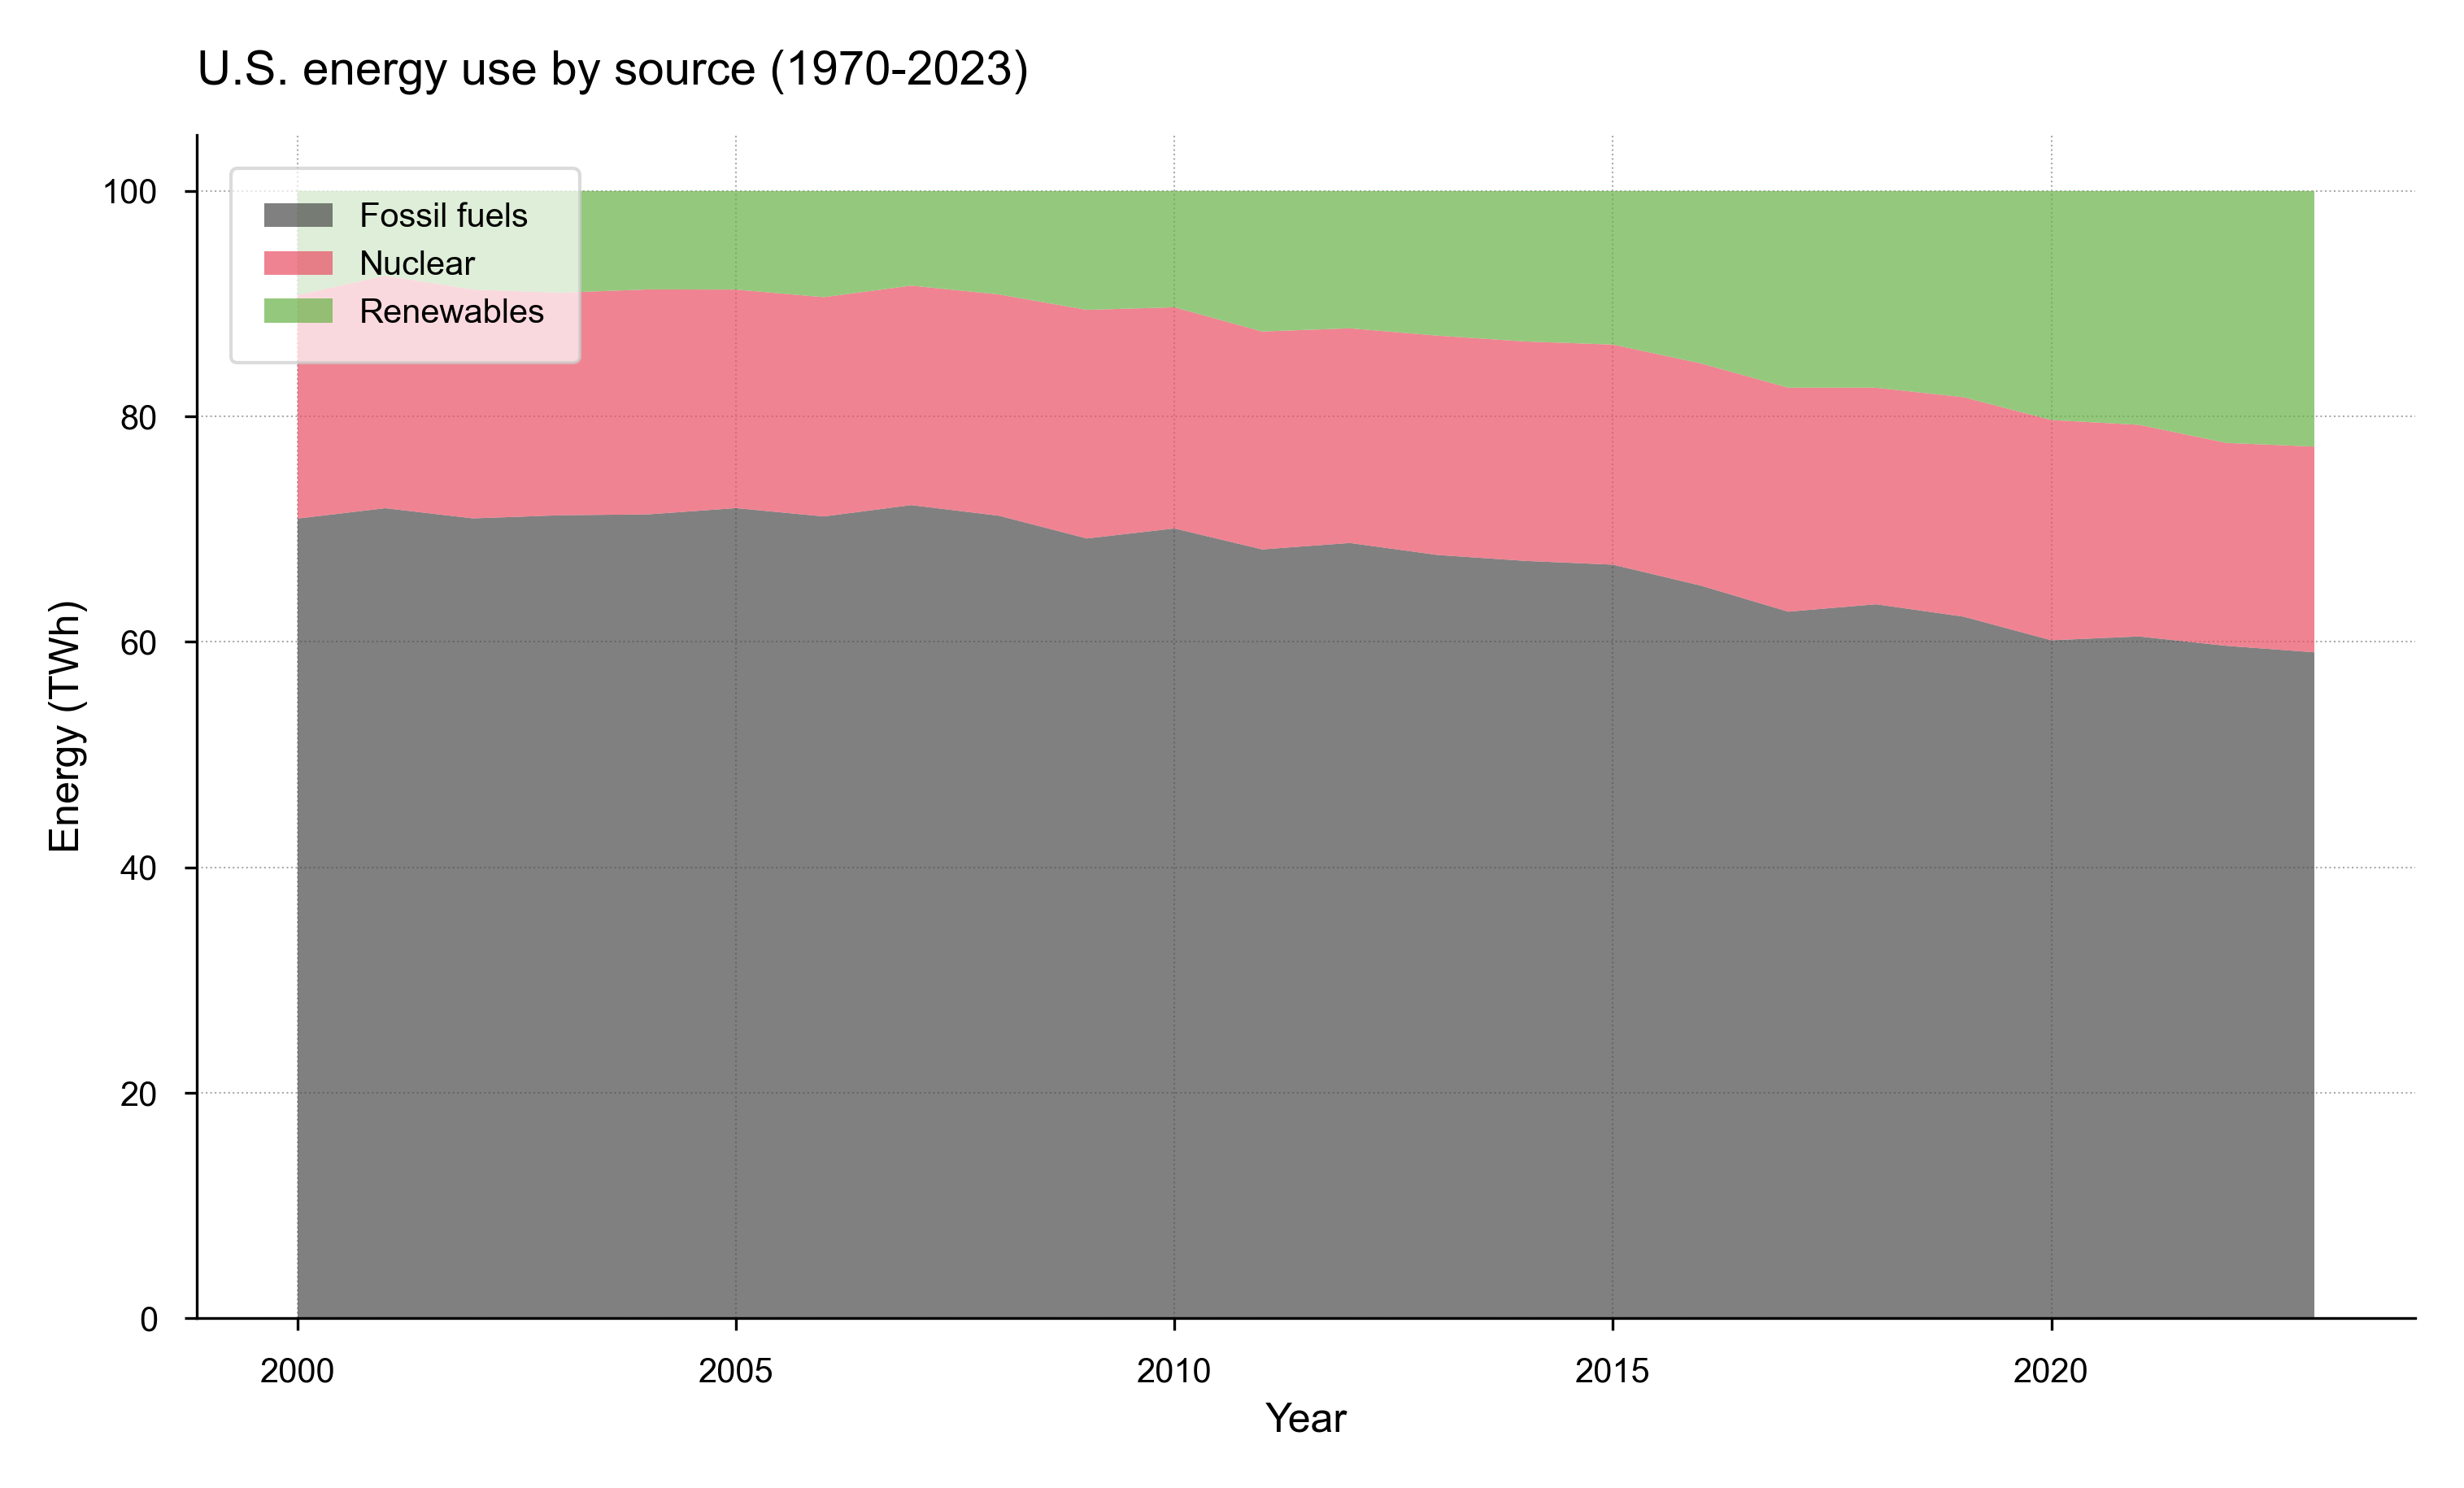

In [18]:
y2k_us_df = us_df[us_df["year"] >= 2000]

plt.figure(figsize=(10, 6))


# plt.plot(
#     us_df["year"],
#     us_df["primary_energy_consumption"],
#     # label="Total Energy Demand",
#     # color="blue",
#     linewidth=2,
# )
plt.stackplot(
    y2k_us_df["year"], 
    y2k_us_df["fossil_share_elec"],
    y2k_us_df["nuclear_share_elec"],
    y2k_us_df["renewables_share_elec"],
    # us_df["coal_consumption"],
    labels=["Fossil fuels", "Nuclear", "Renewables"], 
    # colors=["skyblue", "lightcoral", "lightgreen"], 
    alpha=0.7
)
plt.xlabel("Year")
plt.ylabel("Energy (TWh)")
plt.title("U.S. energy use by source (1970-2023)", loc="left", fontweight="regular")
plt.legend(
    loc="upper left",
    frameon=True,
    # fancybox=True,
    # shadow=True,
    framealpha=0.7,
    borderpad=1,
)

plt.gca().set_axisbelow(True)
# plt.savefig("../../joypauls.dev-astro/src/assets/blog/energy-use-in-us/energy_use.png")
plt.show()



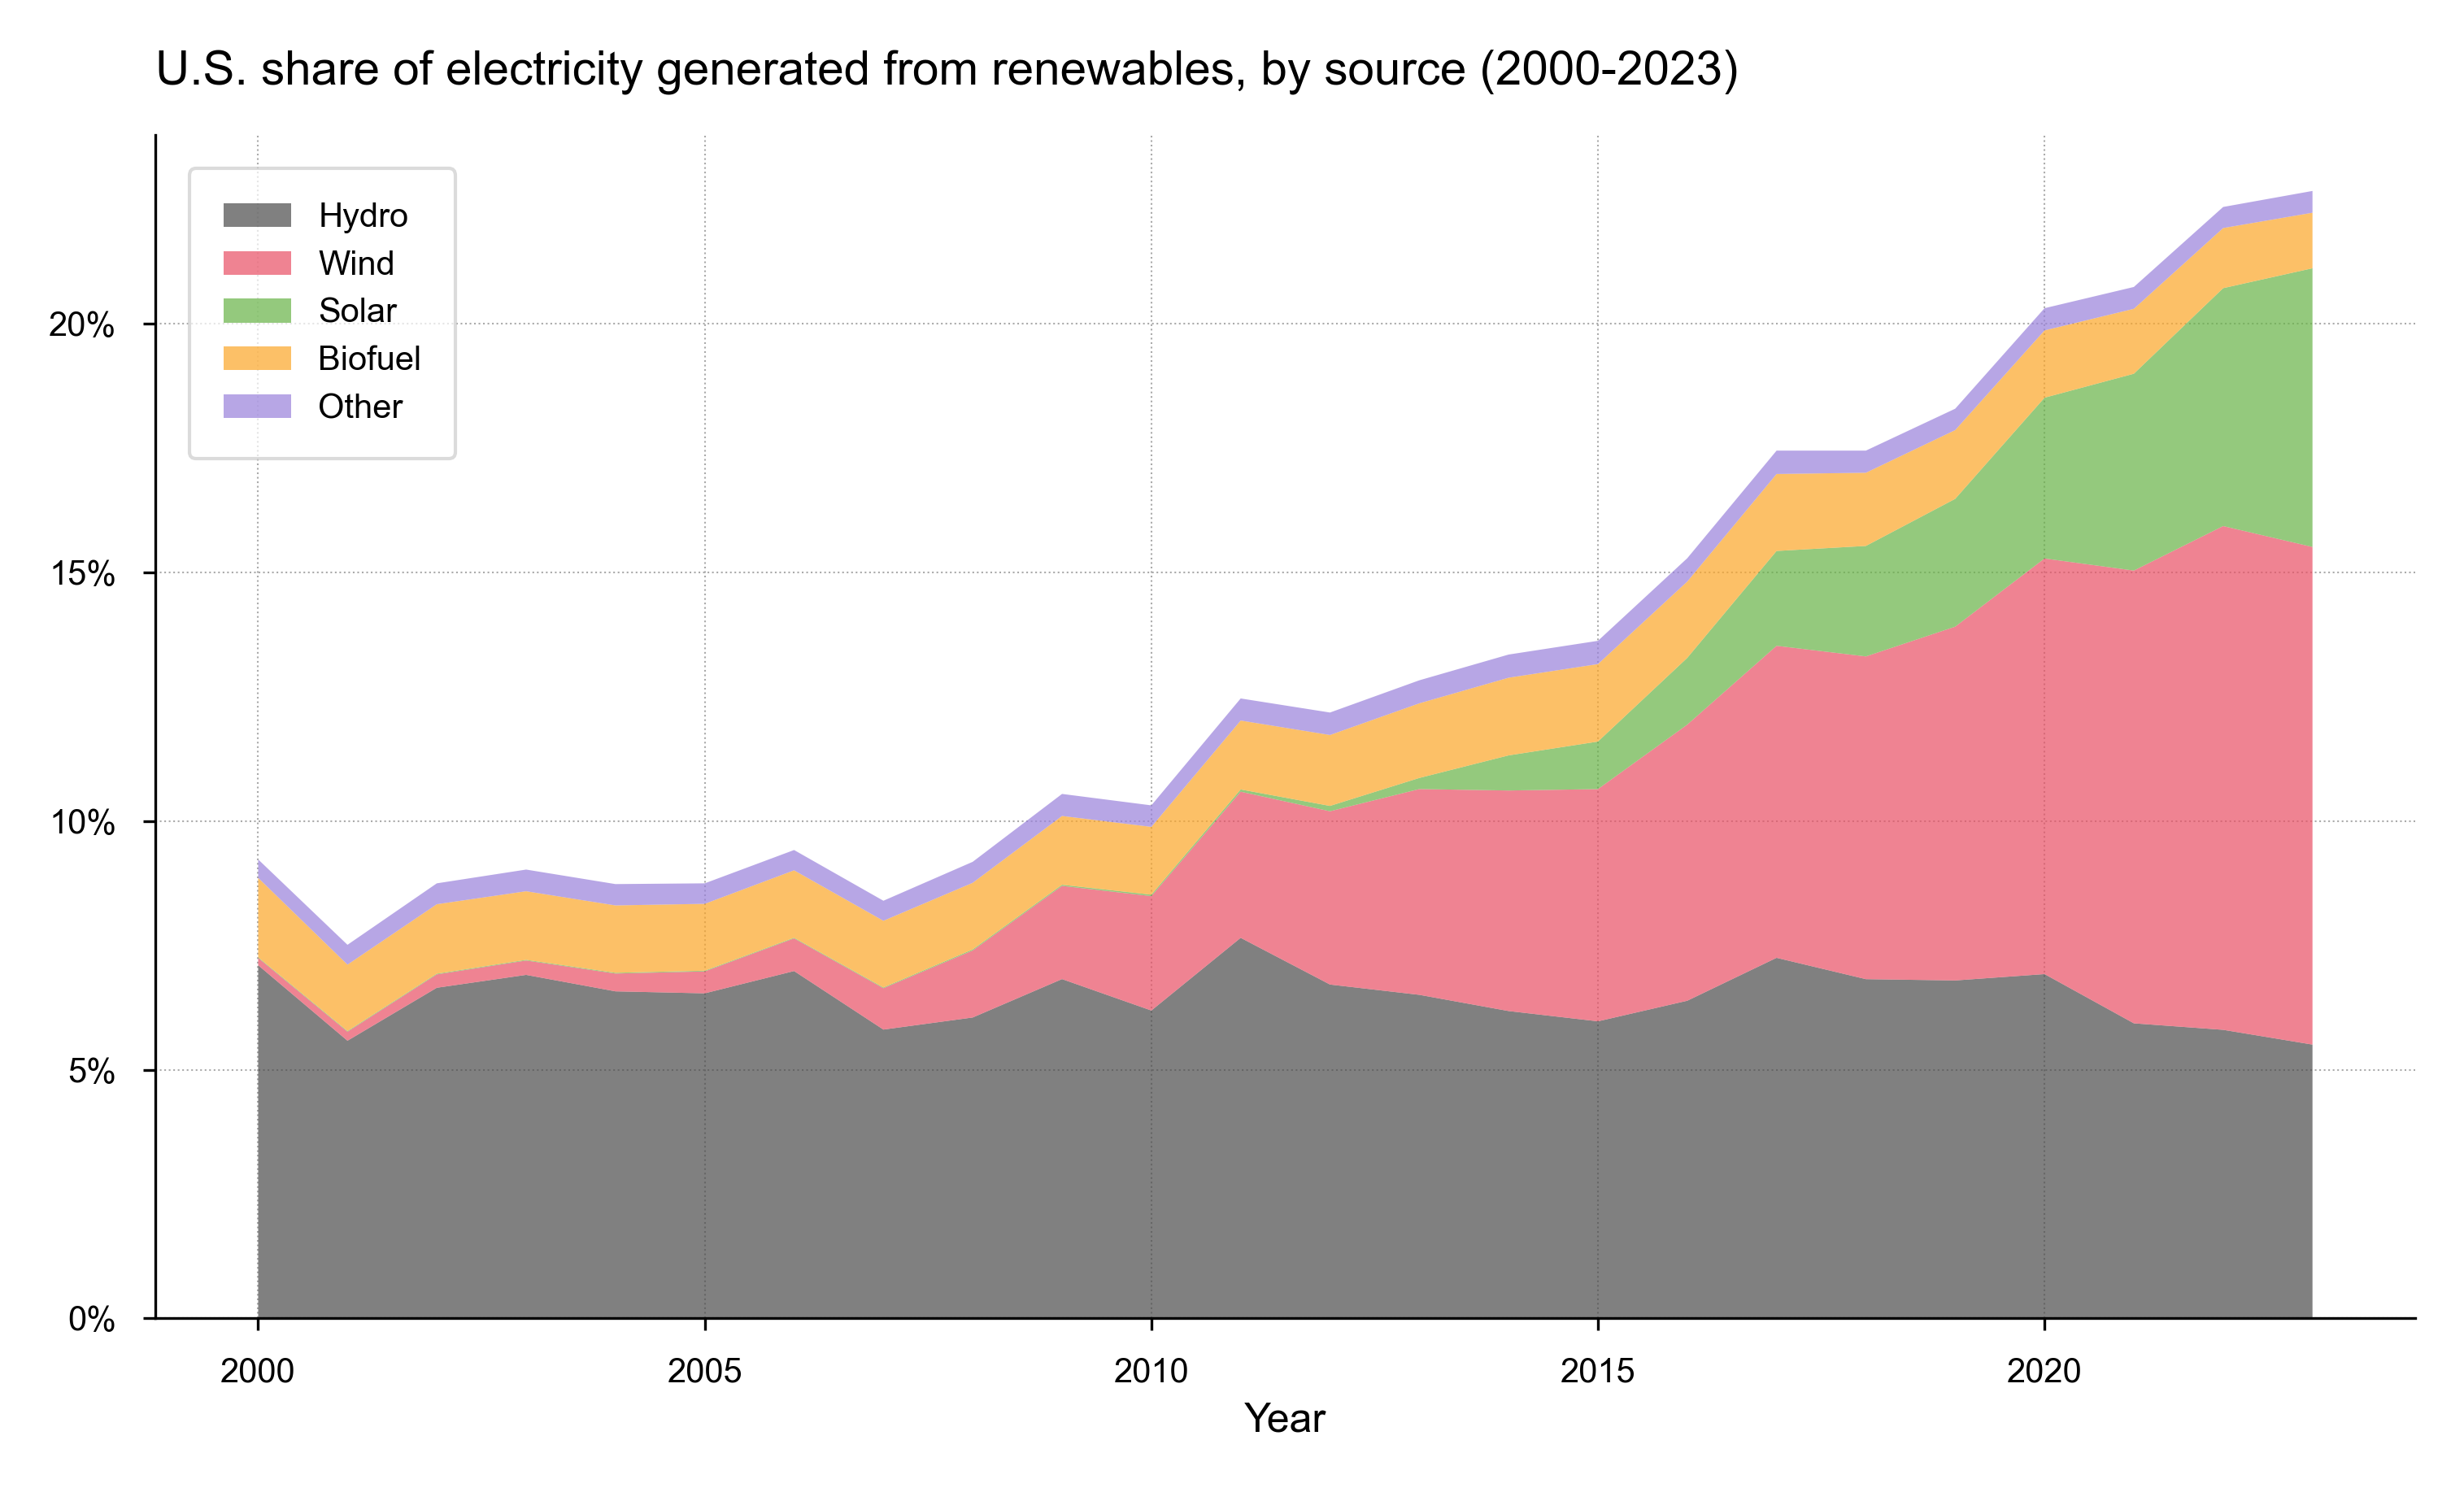

In [21]:
renewables_us_df = us_df[us_df["year"] >= 2000]

plt.figure(figsize=(10, 6))

# plt.plot(
#     renewables_us_df["year"],
#     renewables_us_df["renewables_share_elec"],
#     # label="Total Energy Demand",
#     # color="blue",
#     linewidth=2,
# )
plt.stackplot(
    renewables_us_df["year"], 
    renewables_us_df["hydro_share_elec"],
    renewables_us_df["wind_share_elec"],
    renewables_us_df["solar_share_elec"],
    renewables_us_df["biofuel_share_elec"],
    renewables_us_df["other_renewables_share_elec_exc_biofuel"],
    # us_df["coal_consumption"],
    labels=["Hydro", "Wind", "Solar", "Biofuel", "Other"], 
    # colors=['skyblue', 'lightcoral', 'lightgreen'], 
    alpha=0.7
)
plt.xlabel("Year")
# plt.ylabel("Energy (TWh)")
plt.title("U.S. share of electricity generated from renewables, by source (2000-2023)", loc="left", fontweight="regular")
plt.legend(
    loc="upper left",
    frameon=True,
    # fancybox=True,
    # shadow=True,
    framealpha=0.7,
    borderpad=1,
)

plt.gca().set_axisbelow(True)
# format y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}%'.format(x)))
plt.savefig("../../joypauls.dev-astro/src/assets/blog/energy-use-in-us/renewable_electricity.png")
plt.show()



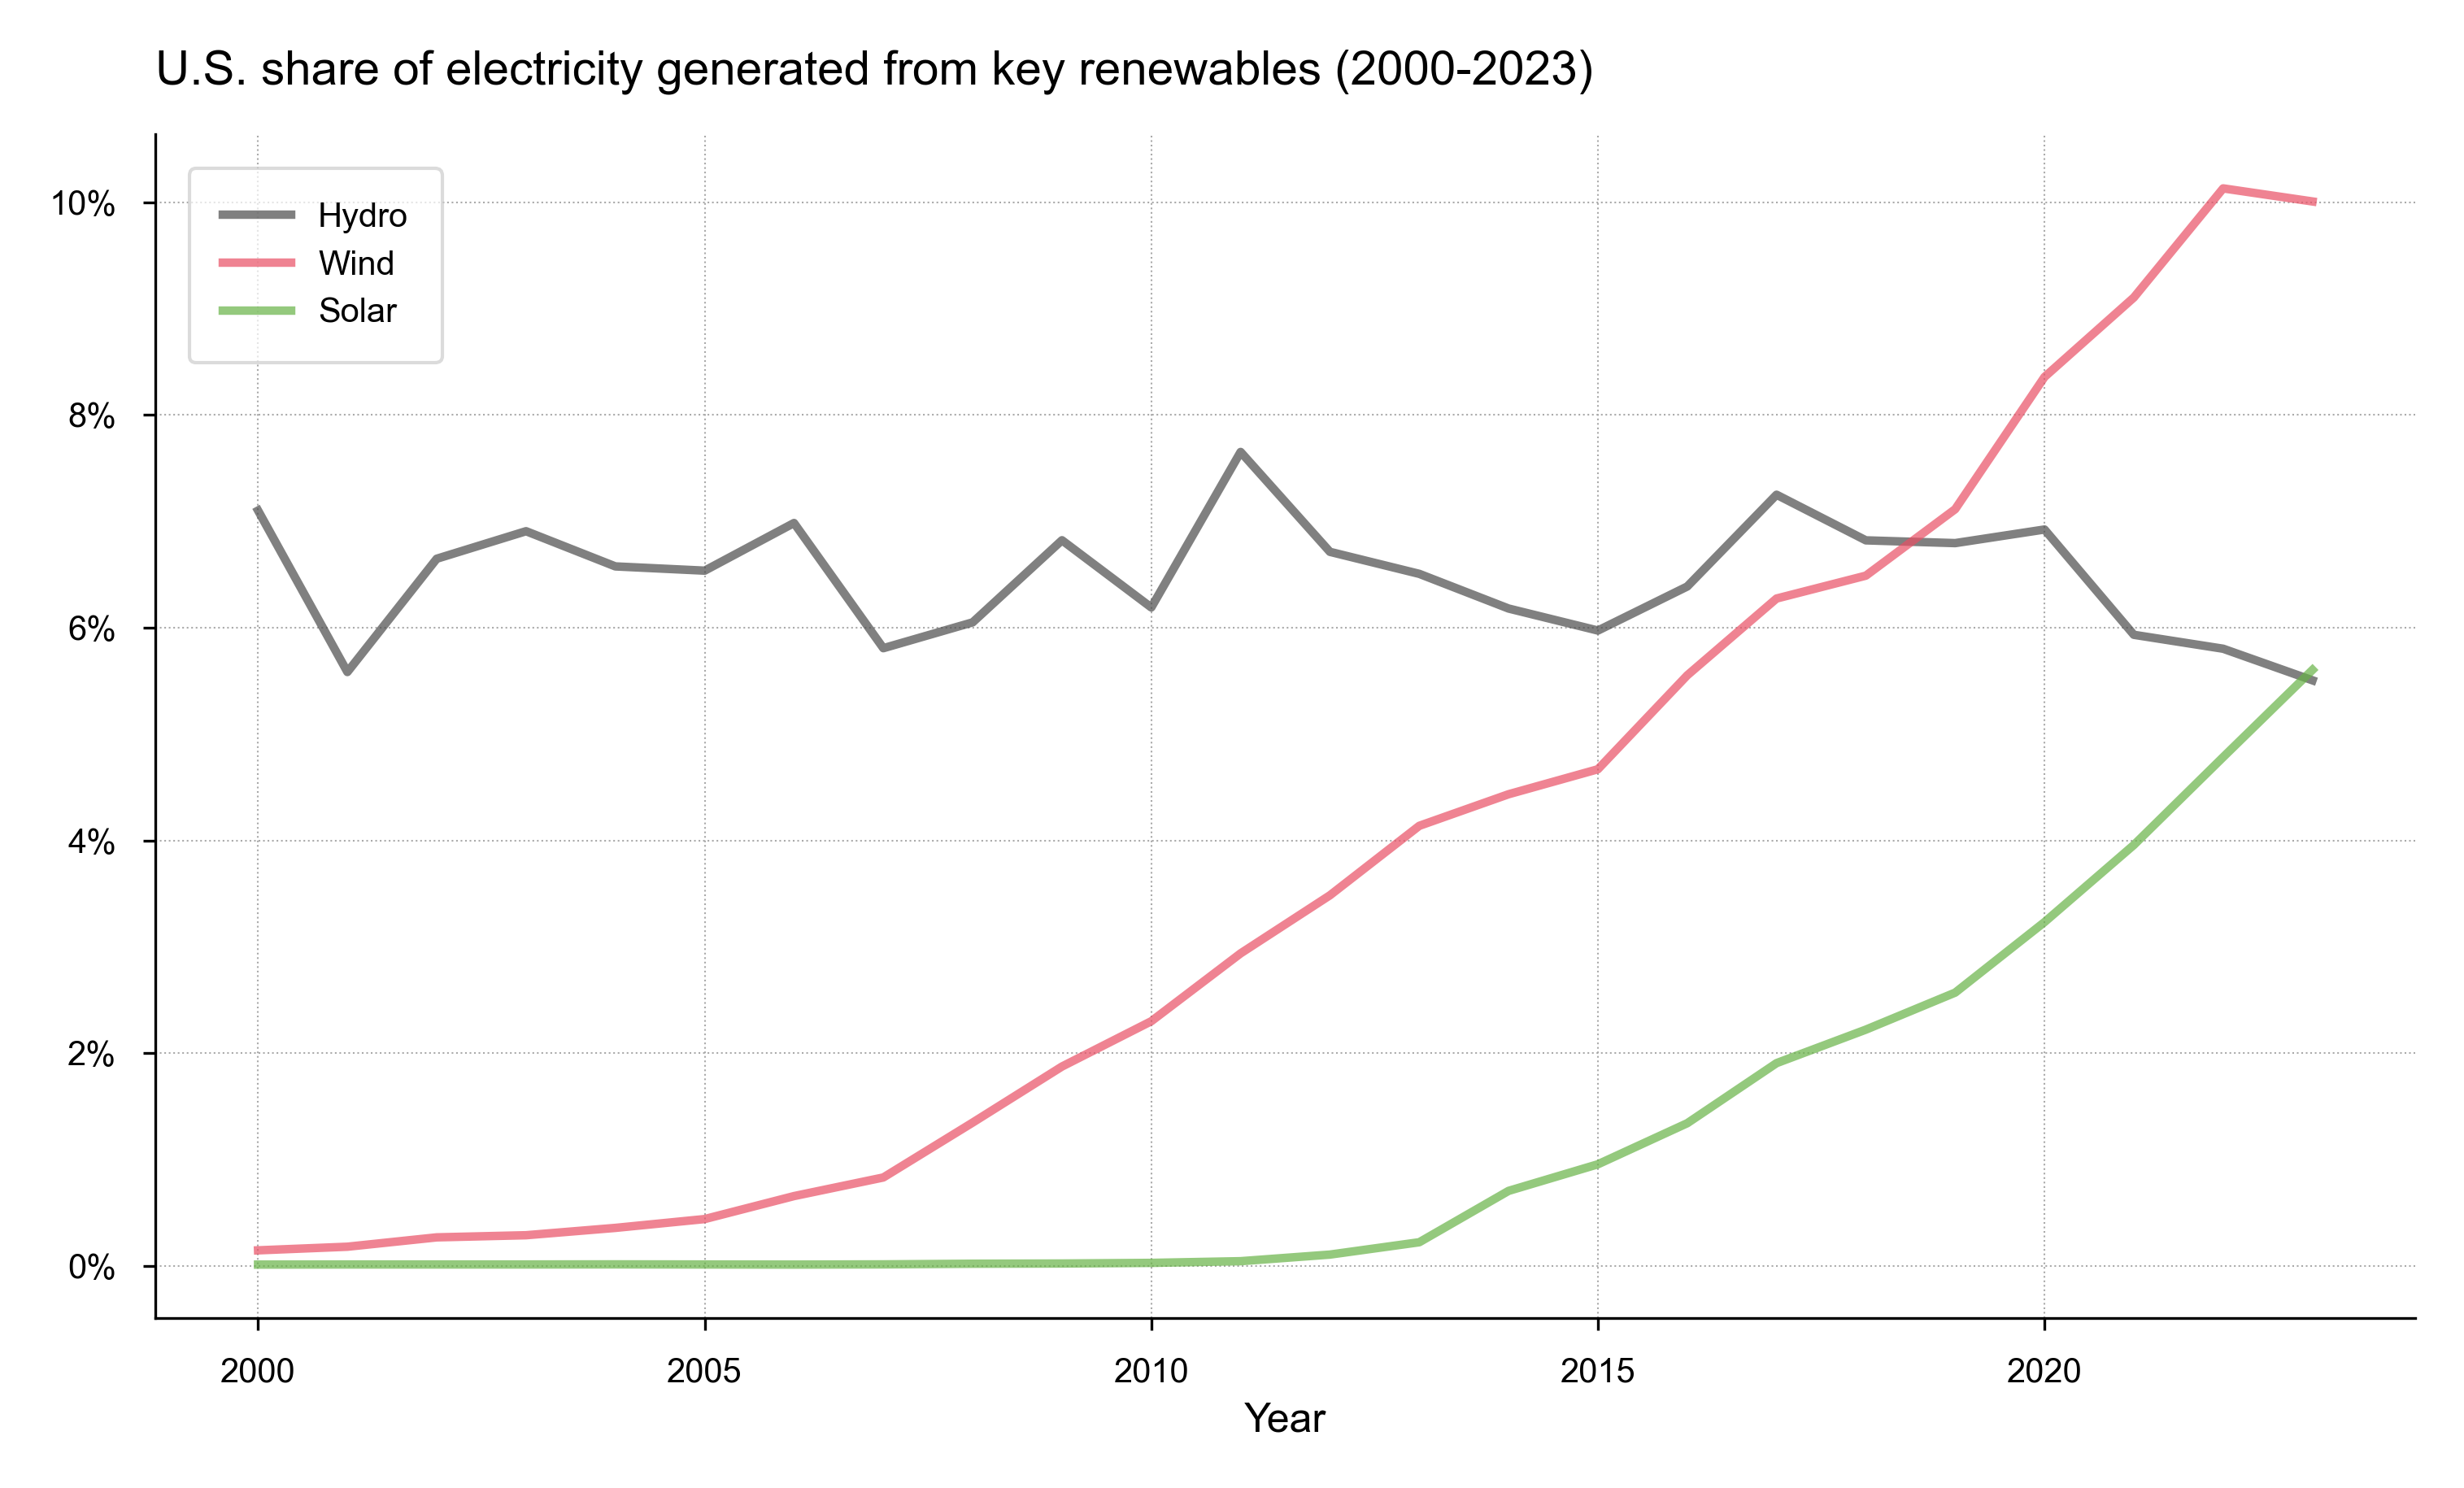

In [19]:
renewables_us_df = us_df[us_df["year"] >= 2000]

plt.figure(figsize=(10, 6))

# plt.plot(
#     renewables_us_df["year"],
#     renewables_us_df["renewables_electricity"],
#     # label="Total Energy Demand",
#     # color="blue",
#     linewidth=2,
# )

plt.plot(
    renewables_us_df["year"],
    renewables_us_df["hydro_share_elec"],
    alpha=0.7,
    label="Hydro",
    # color="#1f77b4",
)
plt.plot(
    renewables_us_df["year"],
    renewables_us_df["wind_share_elec"],
    alpha=0.7,
    label="Wind",
    # color="#ff7f0e",
)
# plt.plot(
#     renewables_us_df["year"],
#     renewables_us_df["biofuel_share_elec"],
#     alpha=0.7,
#     label="Biofuel",
#     color="#2ca02c",
# )
plt.plot(
    renewables_us_df["year"],
    renewables_us_df["solar_share_elec"],
    alpha=0.7,
    label="Solar",
    # color="#2ca02c",
)
# plt.plot(
#     renewables_us_df["year"],
#     renewables_us_df["other_renewables_share_elec"],
#     alpha=0.7,
#     label="Other",
#     color="#9467bd",
# )
# plt.stackplot(
#     renewables_us_df["year"], 
#     renewables_us_df["hydro_share_elec"],
#     # renewables_us_df["biofuel_electricity"],
#     renewables_us_df["wind_share_elec"],
#     renewables_us_df["solar_share_elec"],
#     renewables_us_df["other_renewables_share_elec"],
#     # us_df["coal_consumption"],
#     labels=["Hydro", "Wind", "Solar", "Other"],
#     colors=["#1f77b4", "#ff7f0e", "#d62728", "#9467bd"], 
#     alpha=0.7
# )
plt.xlabel("Year")
# plt.ylabel("Percent")
plt.title("U.S. share of electricity generated from key renewables (2000-2023)", loc="left", fontweight="regular")
plt.legend(
    loc="upper left",
    frameon=True,
    # fancybox=True,
    # shadow=True,
    framealpha=0.7,
    borderpad=1,
)

# format y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}%'.format(x)))

plt.gca().set_axisbelow(True)
plt.savefig("../../joypauls.dev-astro/src/assets/blog/energy-use-in-us/renewable_electricity_lines.png")
plt.show()

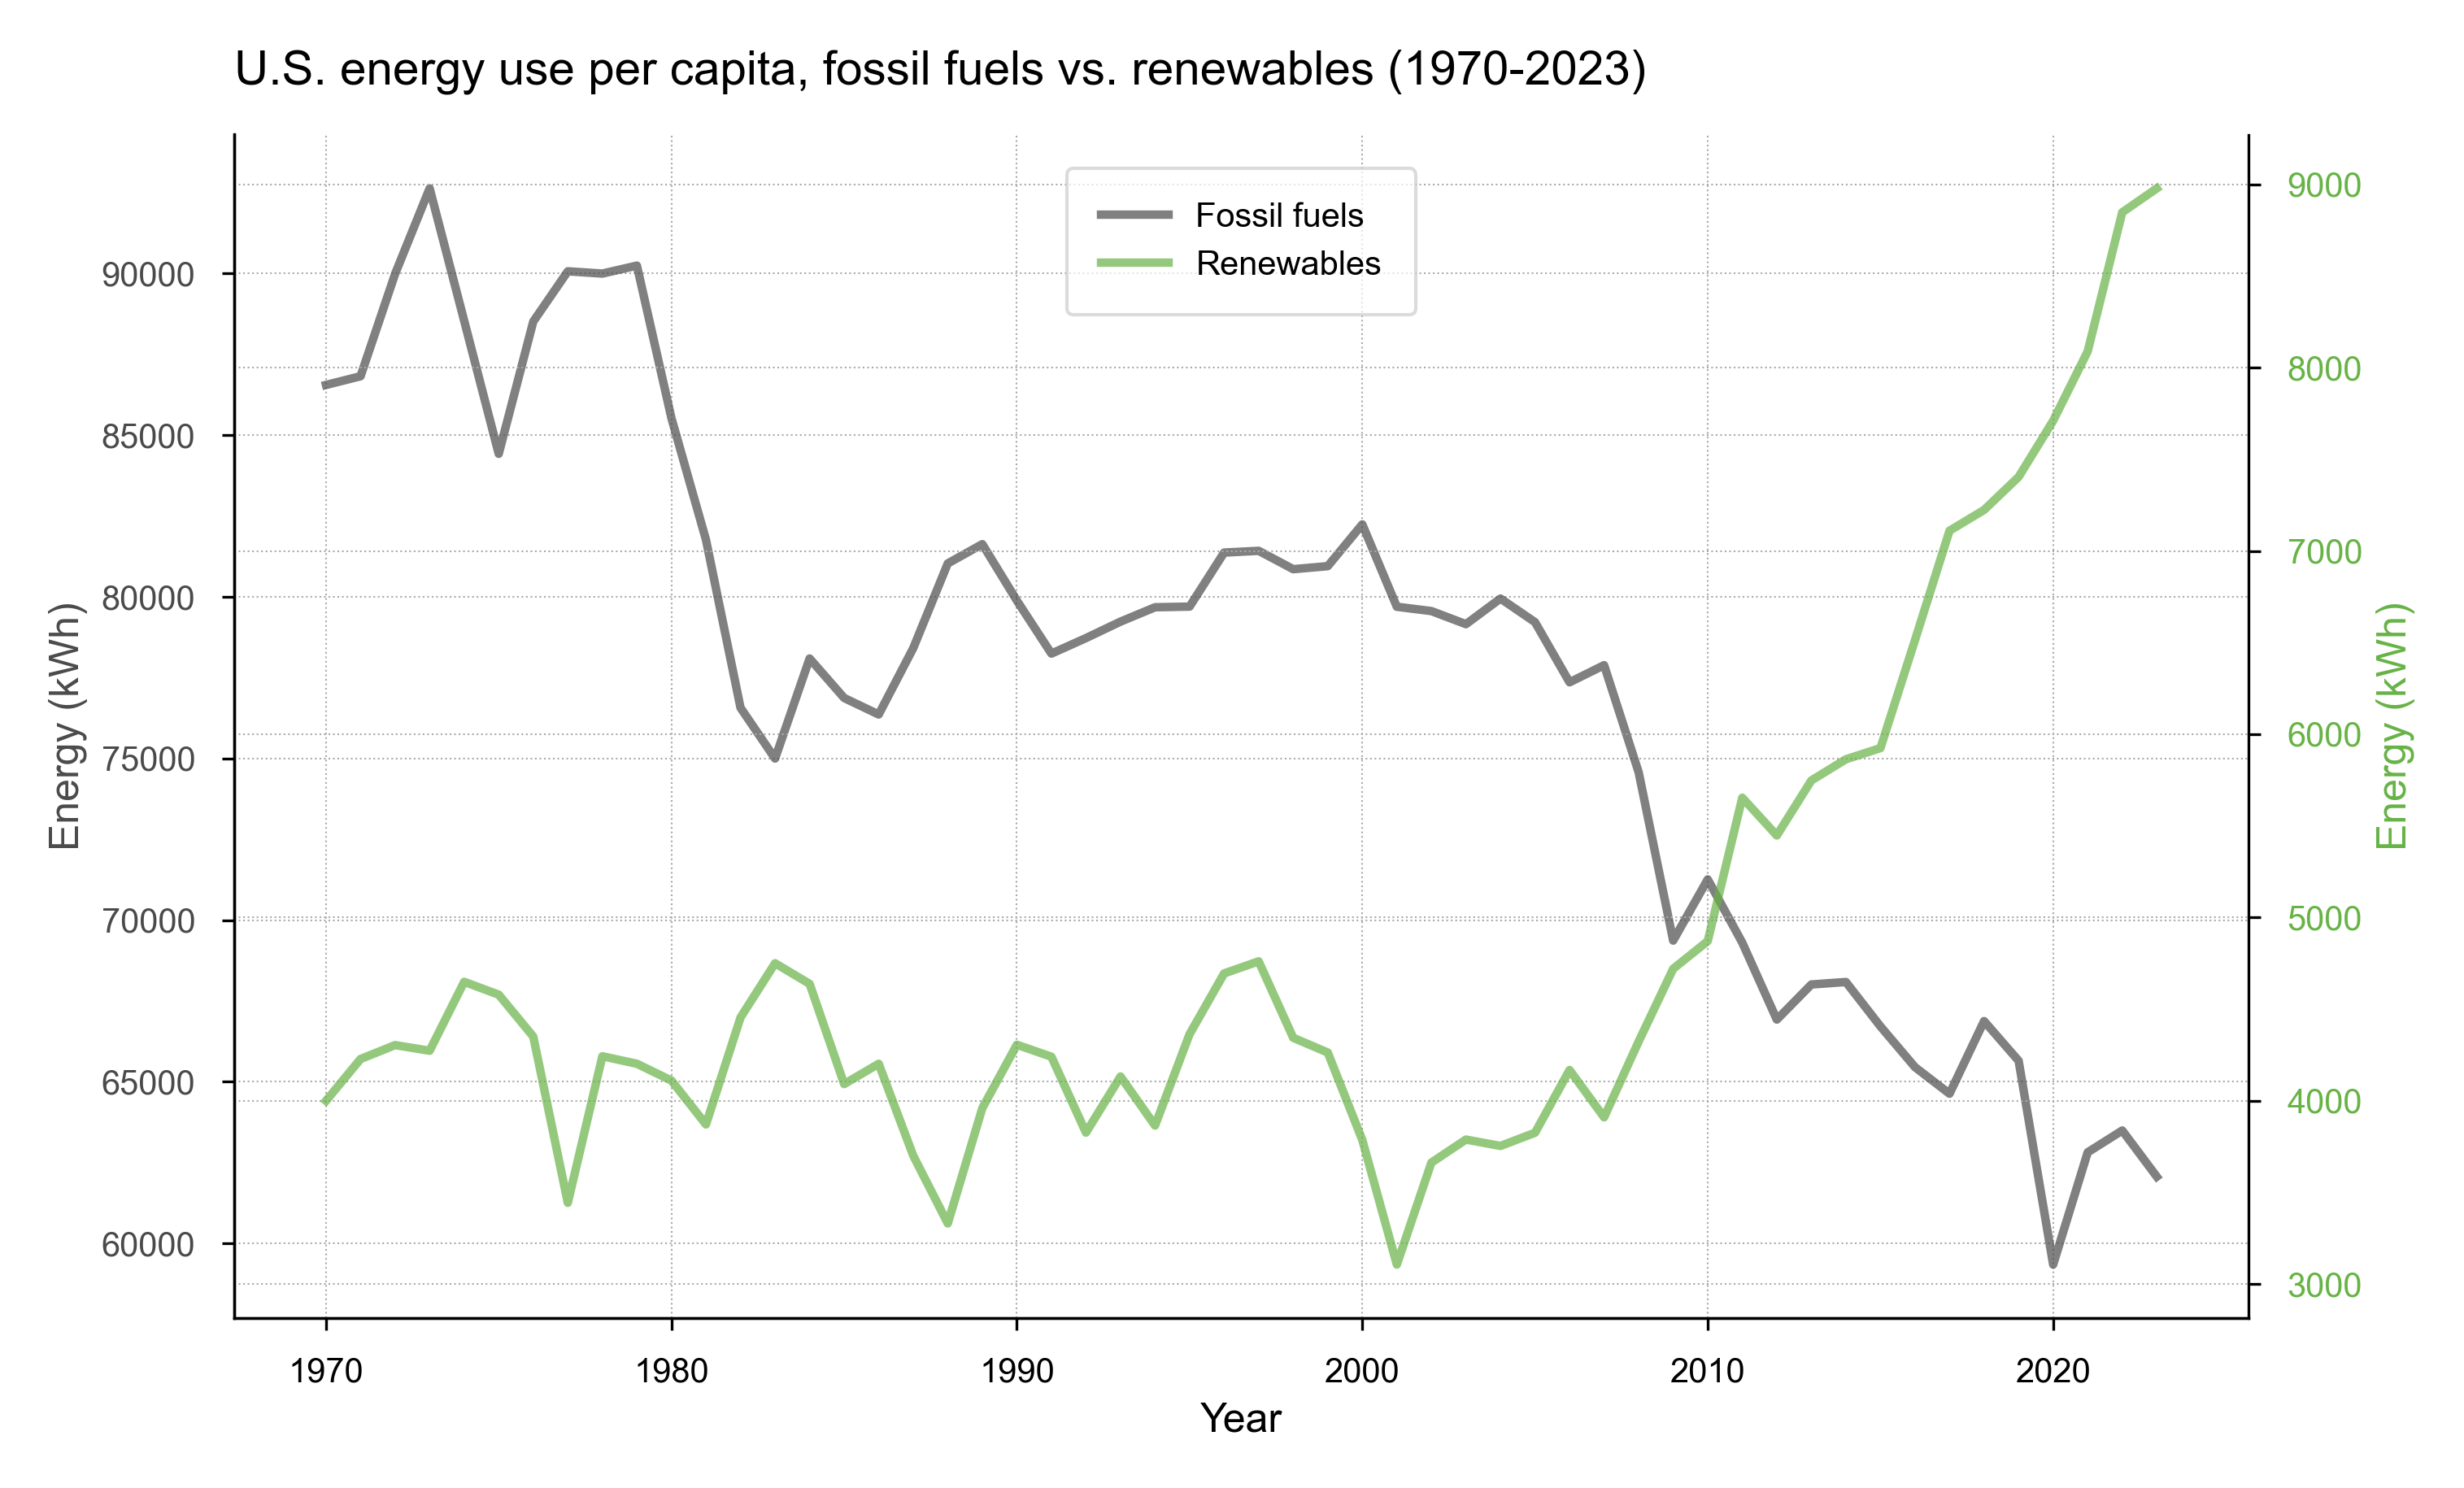

In [753]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = "#4a4a4a"
ax1.plot(us_df["year"], us_df["fossil_energy_per_capita"], color=color1, alpha=0.7, label="Fossil fuels")
ax1.set_ylabel("Energy (kWh)", color=color1)
ax1.tick_params(axis="y", labelcolor=color1)

ax2 = ax1.twinx()

color2 = "#67b346"
ax2.plot(us_df["year"], us_df["renewables_energy_per_capita"], color=color2, alpha=0.7, label="Renewables")
ax2.set_ylabel("Energy (kWh)", color=color2)
ax2.tick_params(axis="y", labelcolor=color2)
ax2.spines["right"].set_visible(True)  

ax1.set_title("U.S. energy use per capita, fossil fuels vs. renewables (1970-2023)", loc="left", fontweight="regular")
ax1.grid(True)
ax1.set_xlabel("Year")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper center", frameon=True, framealpha=0.7, borderpad=1)

plt.tight_layout()
plt.gca().set_axisbelow(True)
plt.savefig("../../joypauls.dev-astro/src/assets/blog/energy-use-in-us/ff_vs_renewables.png")
plt.show()


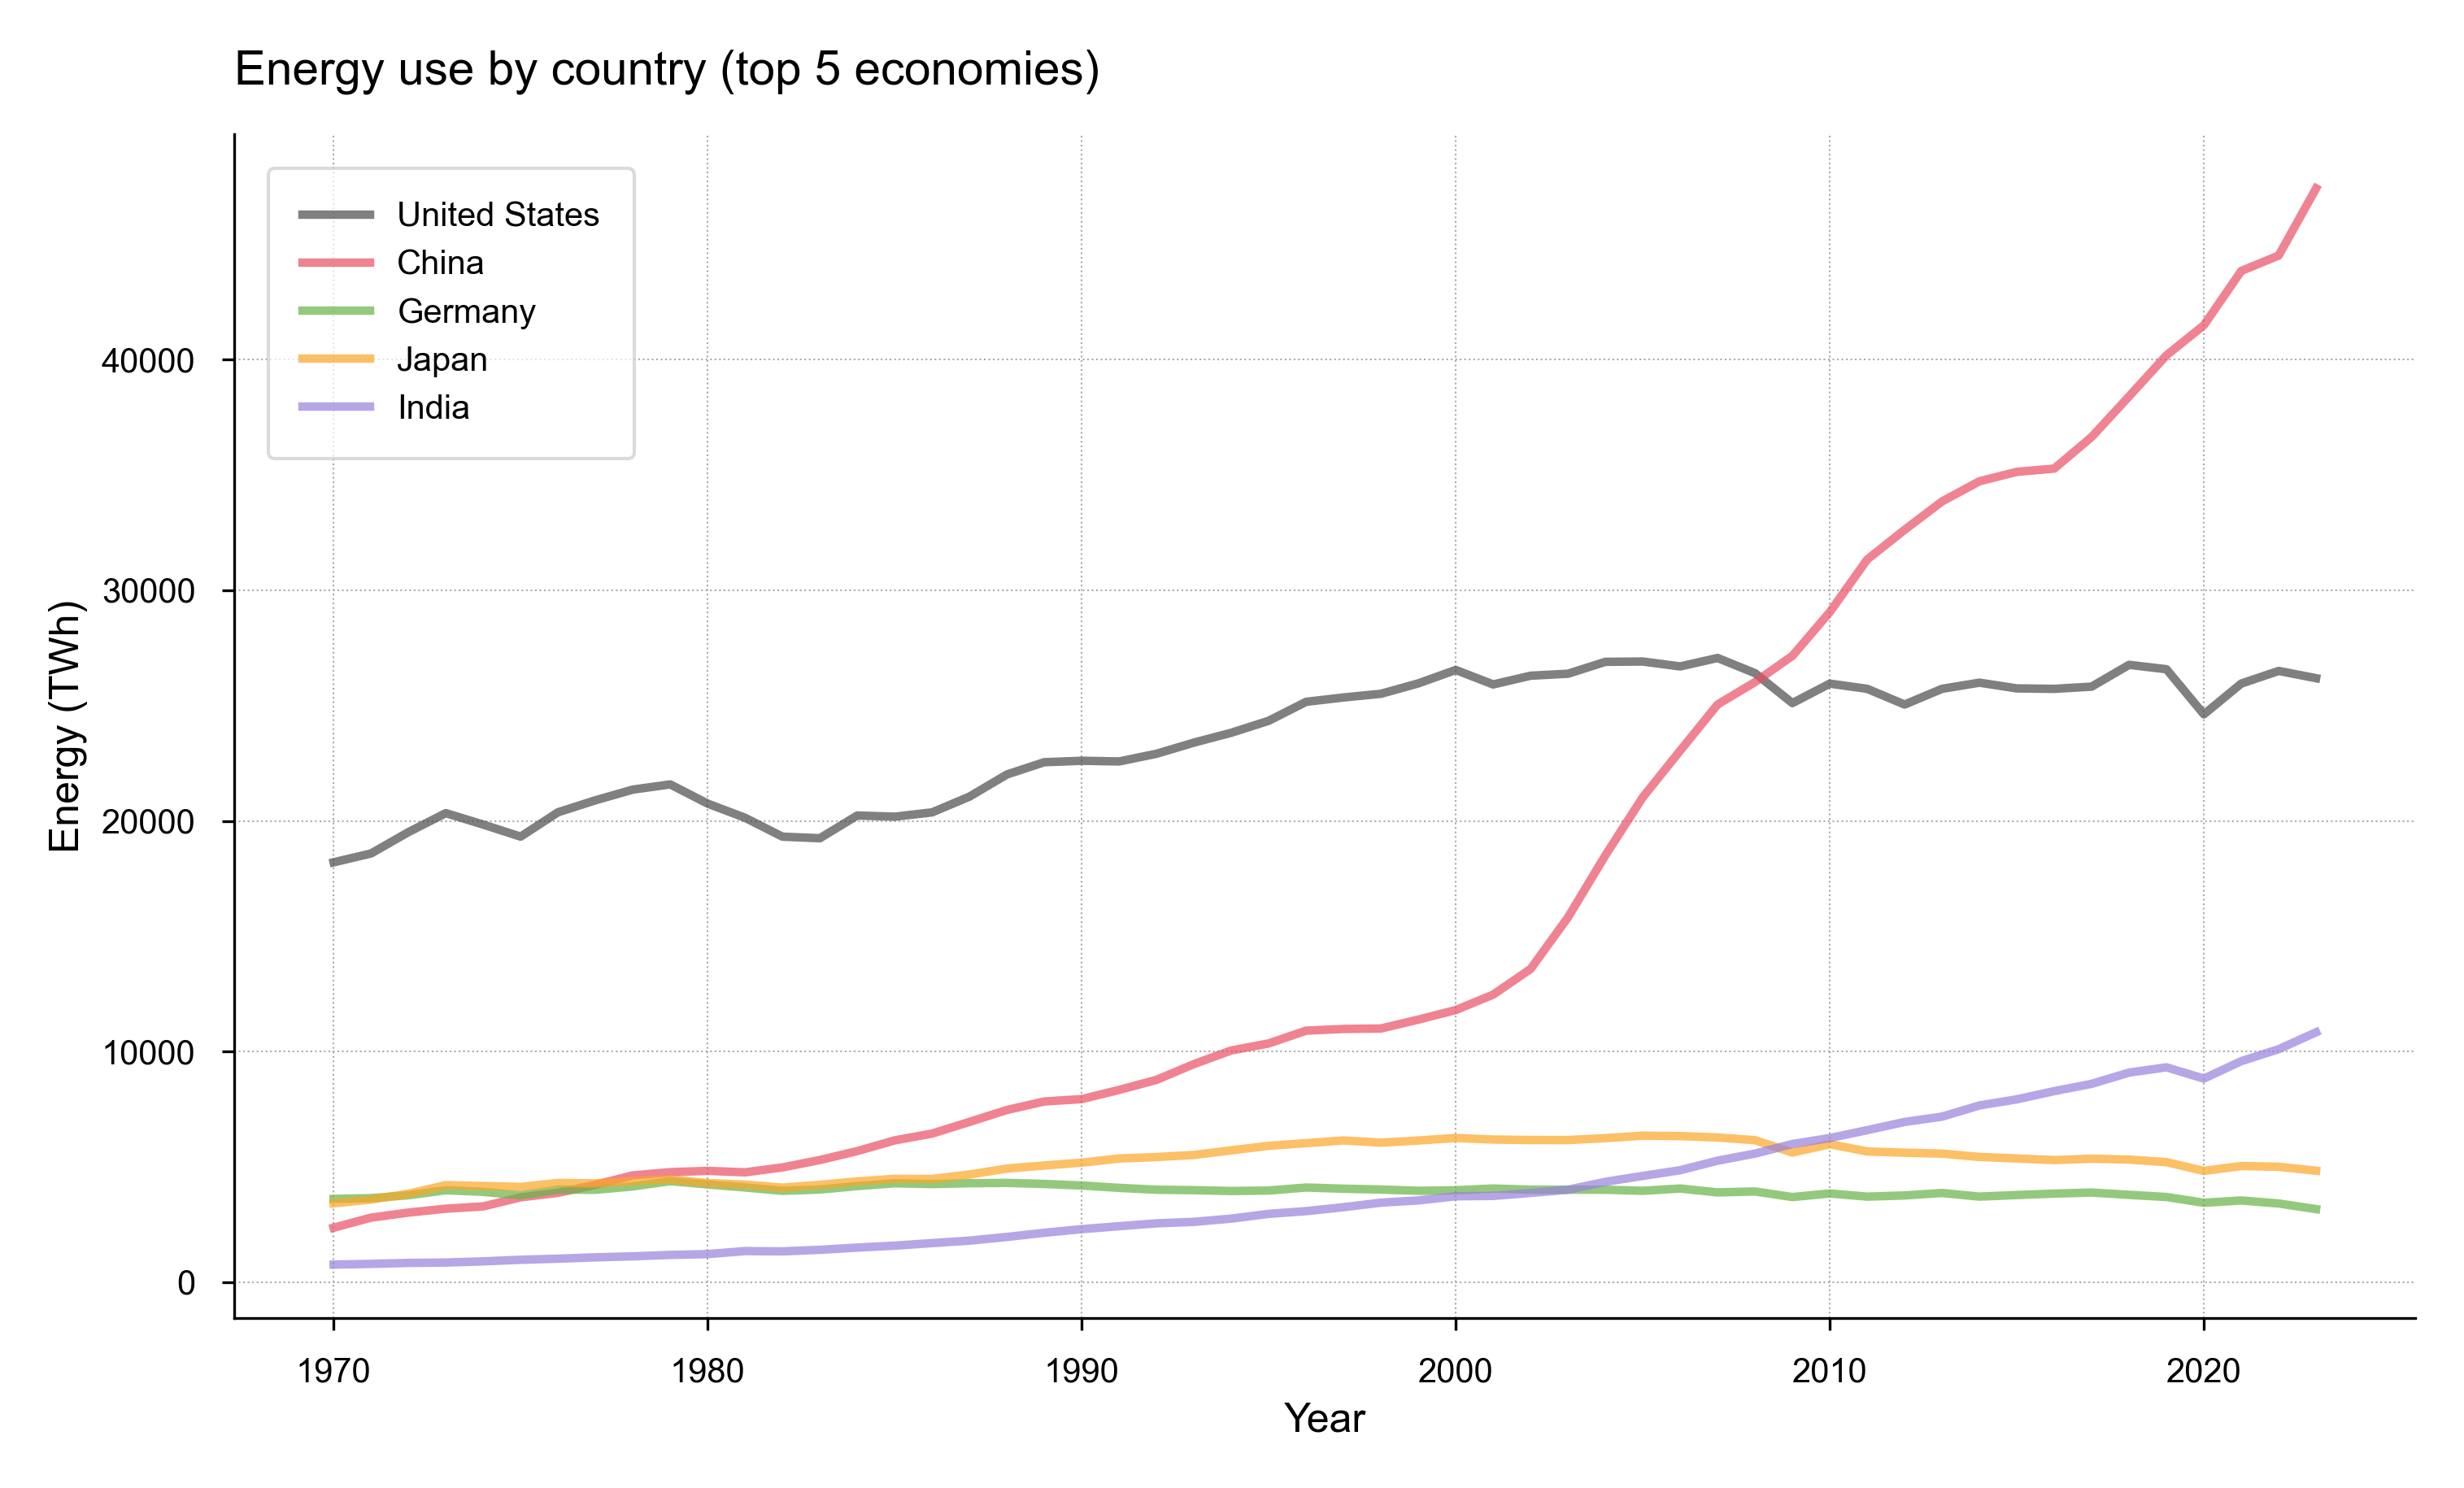

In [748]:
plt.figure(figsize=(10, 6))

plt.plot(
    df[df["country"] == "United States"]["year"],
    df[df["country"] == "United States"]["primary_energy_consumption"],
    # label="Total Energy Demand",
    # color="blue",
    # linewidth=2,
    alpha=0.7,
    label="United States",
)
plt.plot(
    df[df["country"] == "China"]["year"],
    df[df["country"] == "China"]["primary_energy_consumption"],
    alpha=0.7,
    label="China",
)
plt.plot(
    df[df["country"] == "Germany"]["year"],
    df[df["country"] == "Germany"]["primary_energy_consumption"],
    alpha=0.7,
    label="Germany",
)
plt.plot(
    df[df["country"] == "Japan"]["year"],
    df[df["country"] == "Japan"]["primary_energy_consumption"],
    alpha=0.7,
    label="Japan",
)
plt.plot(
    df[df["country"] == "India"]["year"],
    df[df["country"] == "India"]["primary_energy_consumption"],
    alpha=0.7,
    label="India",
)

plt.xlabel("Year")
plt.ylabel("Energy (TWh)")
plt.title("Energy use by country (top 5 economies)", loc="left", fontweight="regular")
plt.legend(
    loc="upper left",
    frameon=True,
    # fancybox=True,
    # shadow=True,
    framealpha=0.7,
    borderpad=1,
)

plt.gca().set_axisbelow(True)
plt.savefig("../../joypauls.dev-astro/src/assets/blog/energy-use-in-us/energy_use_country.png")
plt.show()

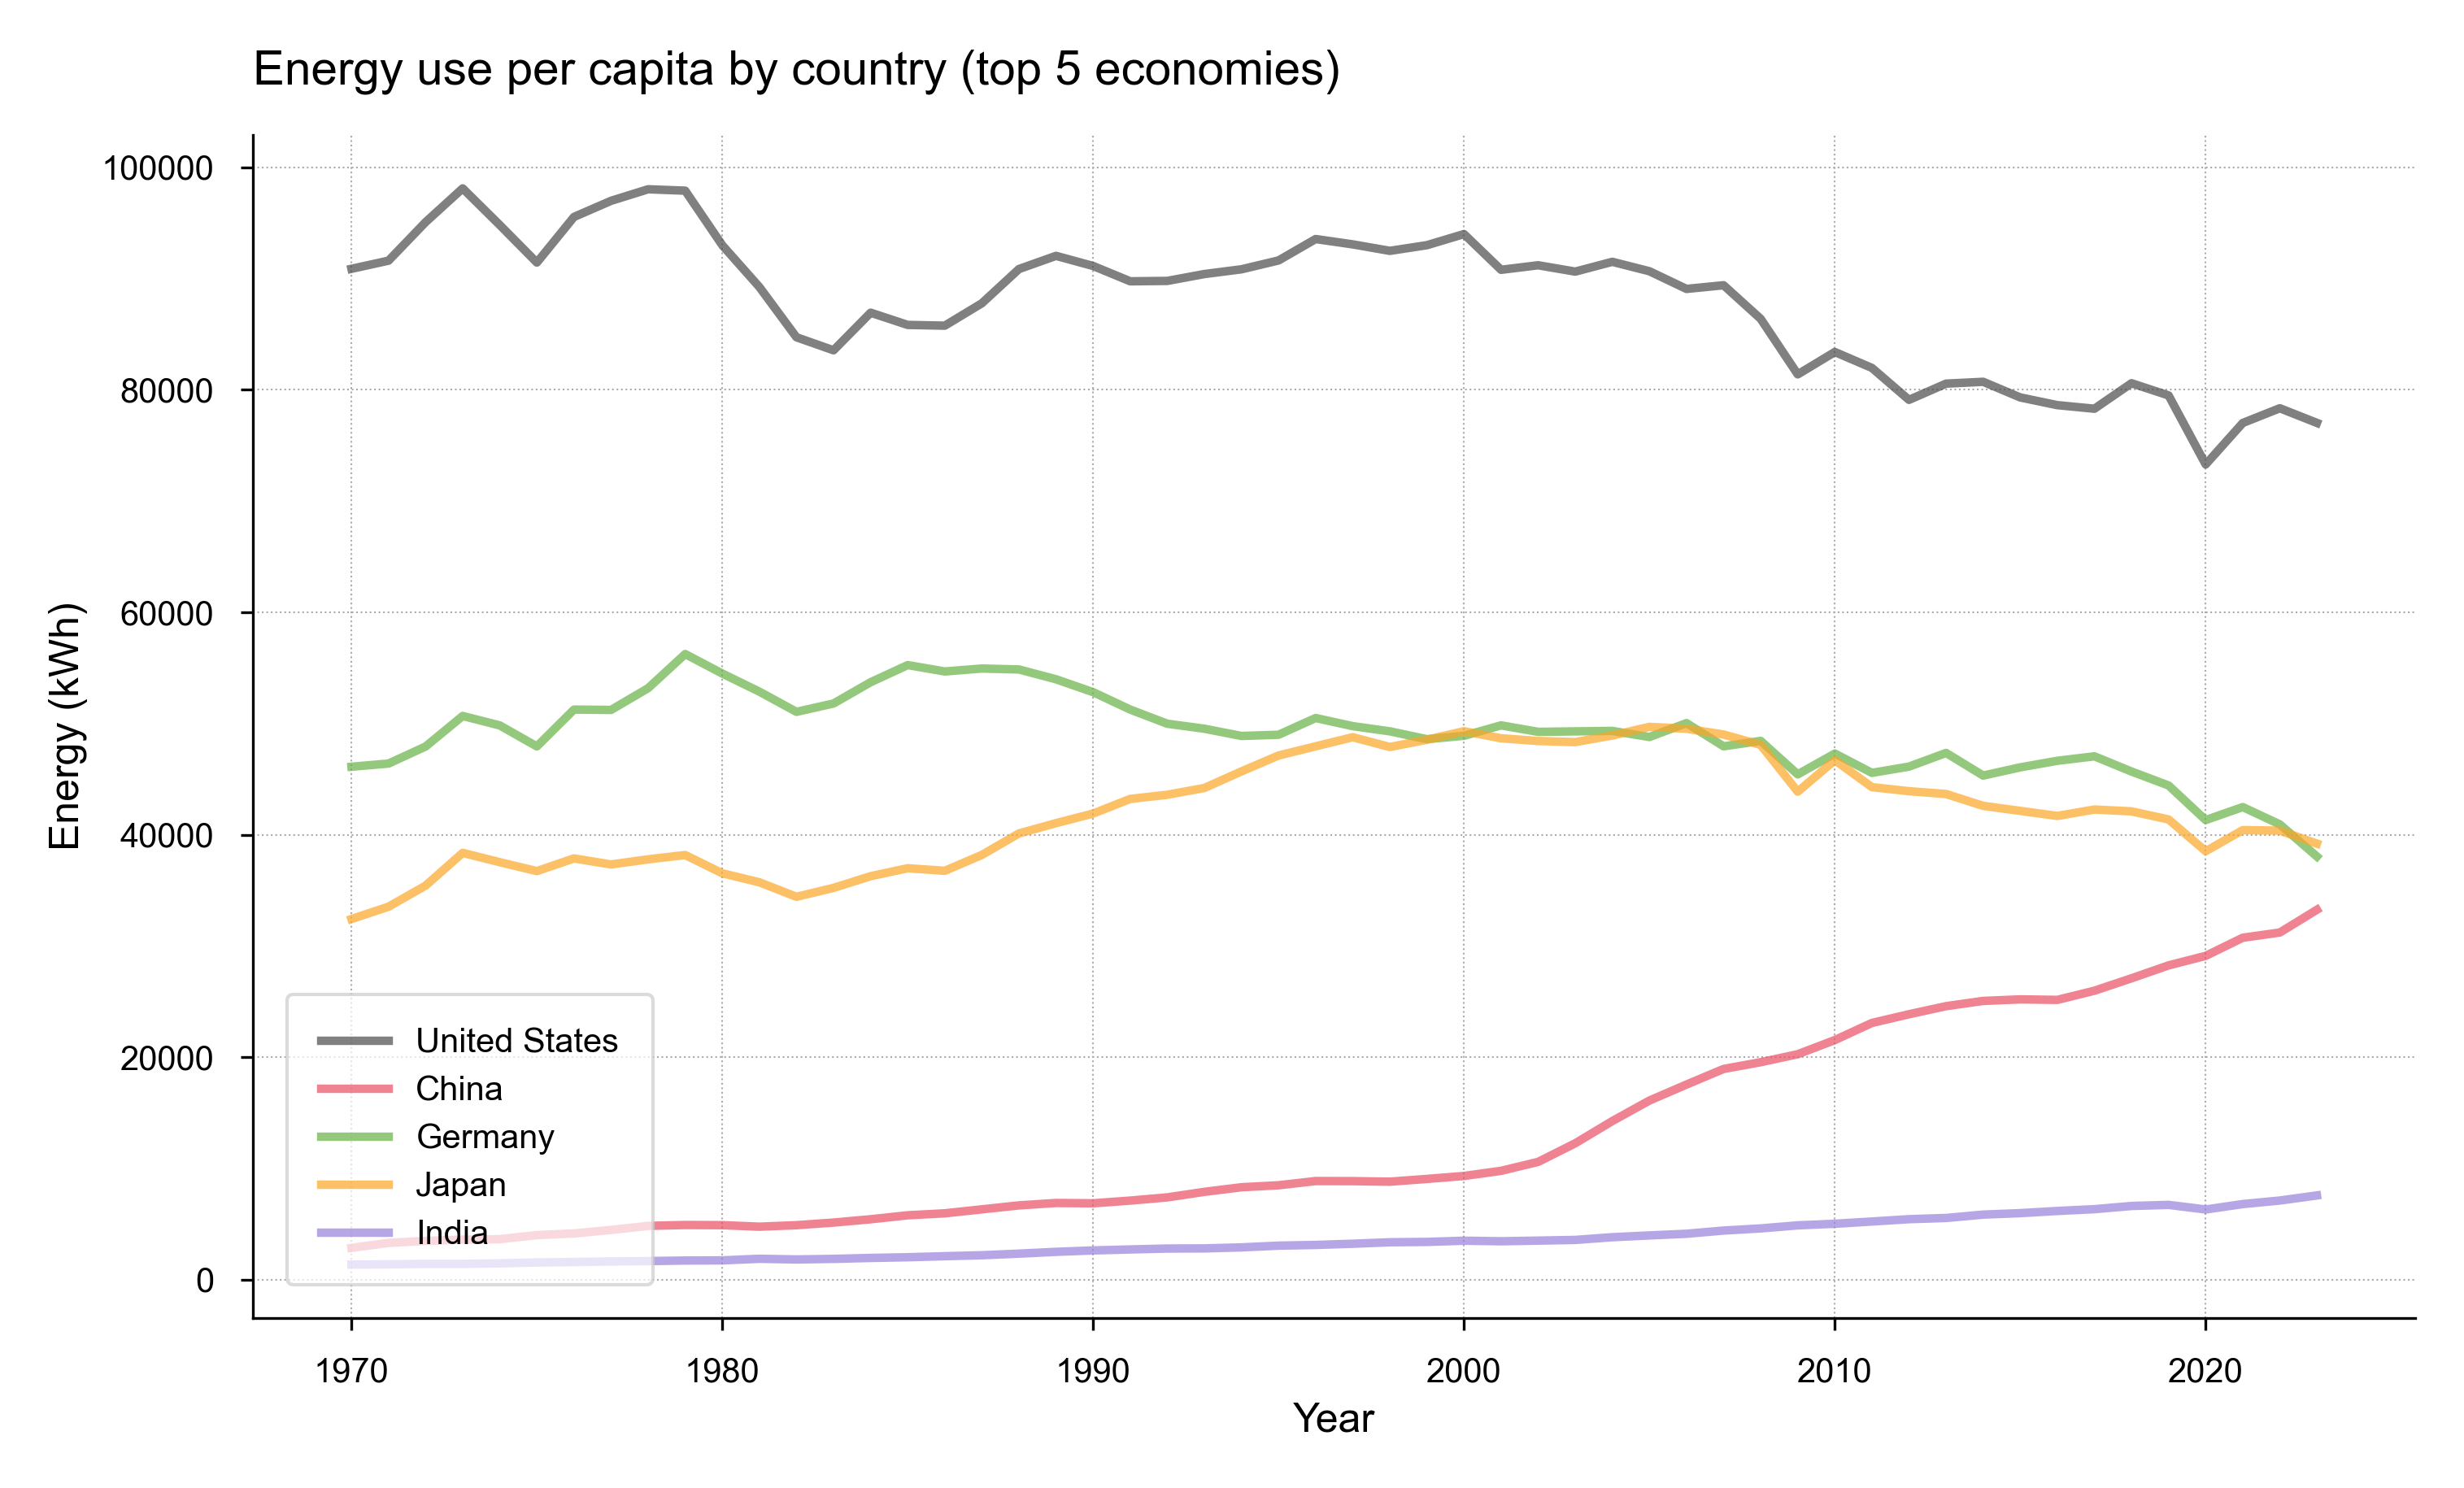

In [749]:
plt.figure(figsize=(10, 6))

plt.plot(
    df[df["country"] == "United States"]["year"],
    df[df["country"] == "United States"]["energy_per_capita"],
    # label="Total Energy Demand",
    # color="blue",
    # linewidth=2,
    alpha=0.7,
    label="United States",
)
plt.plot(
    df[df["country"] == "China"]["year"],
    df[df["country"] == "China"]["energy_per_capita"],
    alpha=0.7,
    label="China",
)
plt.plot(
    df[df["country"] == "Germany"]["year"],
    df[df["country"] == "Germany"]["energy_per_capita"],
    alpha=0.7,
    label="Germany",
)
plt.plot(
    df[df["country"] == "Japan"]["year"],
    df[df["country"] == "Japan"]["energy_per_capita"],
    alpha=0.7,
    label="Japan",
)
plt.plot(
    df[df["country"] == "India"]["year"],
    df[df["country"] == "India"]["energy_per_capita"],
    alpha=0.7,
    label="India",
)

plt.xlabel("Year")
plt.ylabel("Energy (kWh)")
plt.title("Energy use per capita by country (top 5 economies)", loc="left", fontweight="regular")
# plt.legend(loc="lower left")
plt.legend(
    loc="lower left",
    frameon=True,
    # fancybox=True,
    # shadow=True,
    framealpha=0.7,
    borderpad=1,
)

plt.gca().set_axisbelow(True)
plt.savefig("../../joypauls.dev-astro/src/assets/blog/energy-use-in-us/energy_use_country_capita.png")
plt.show()

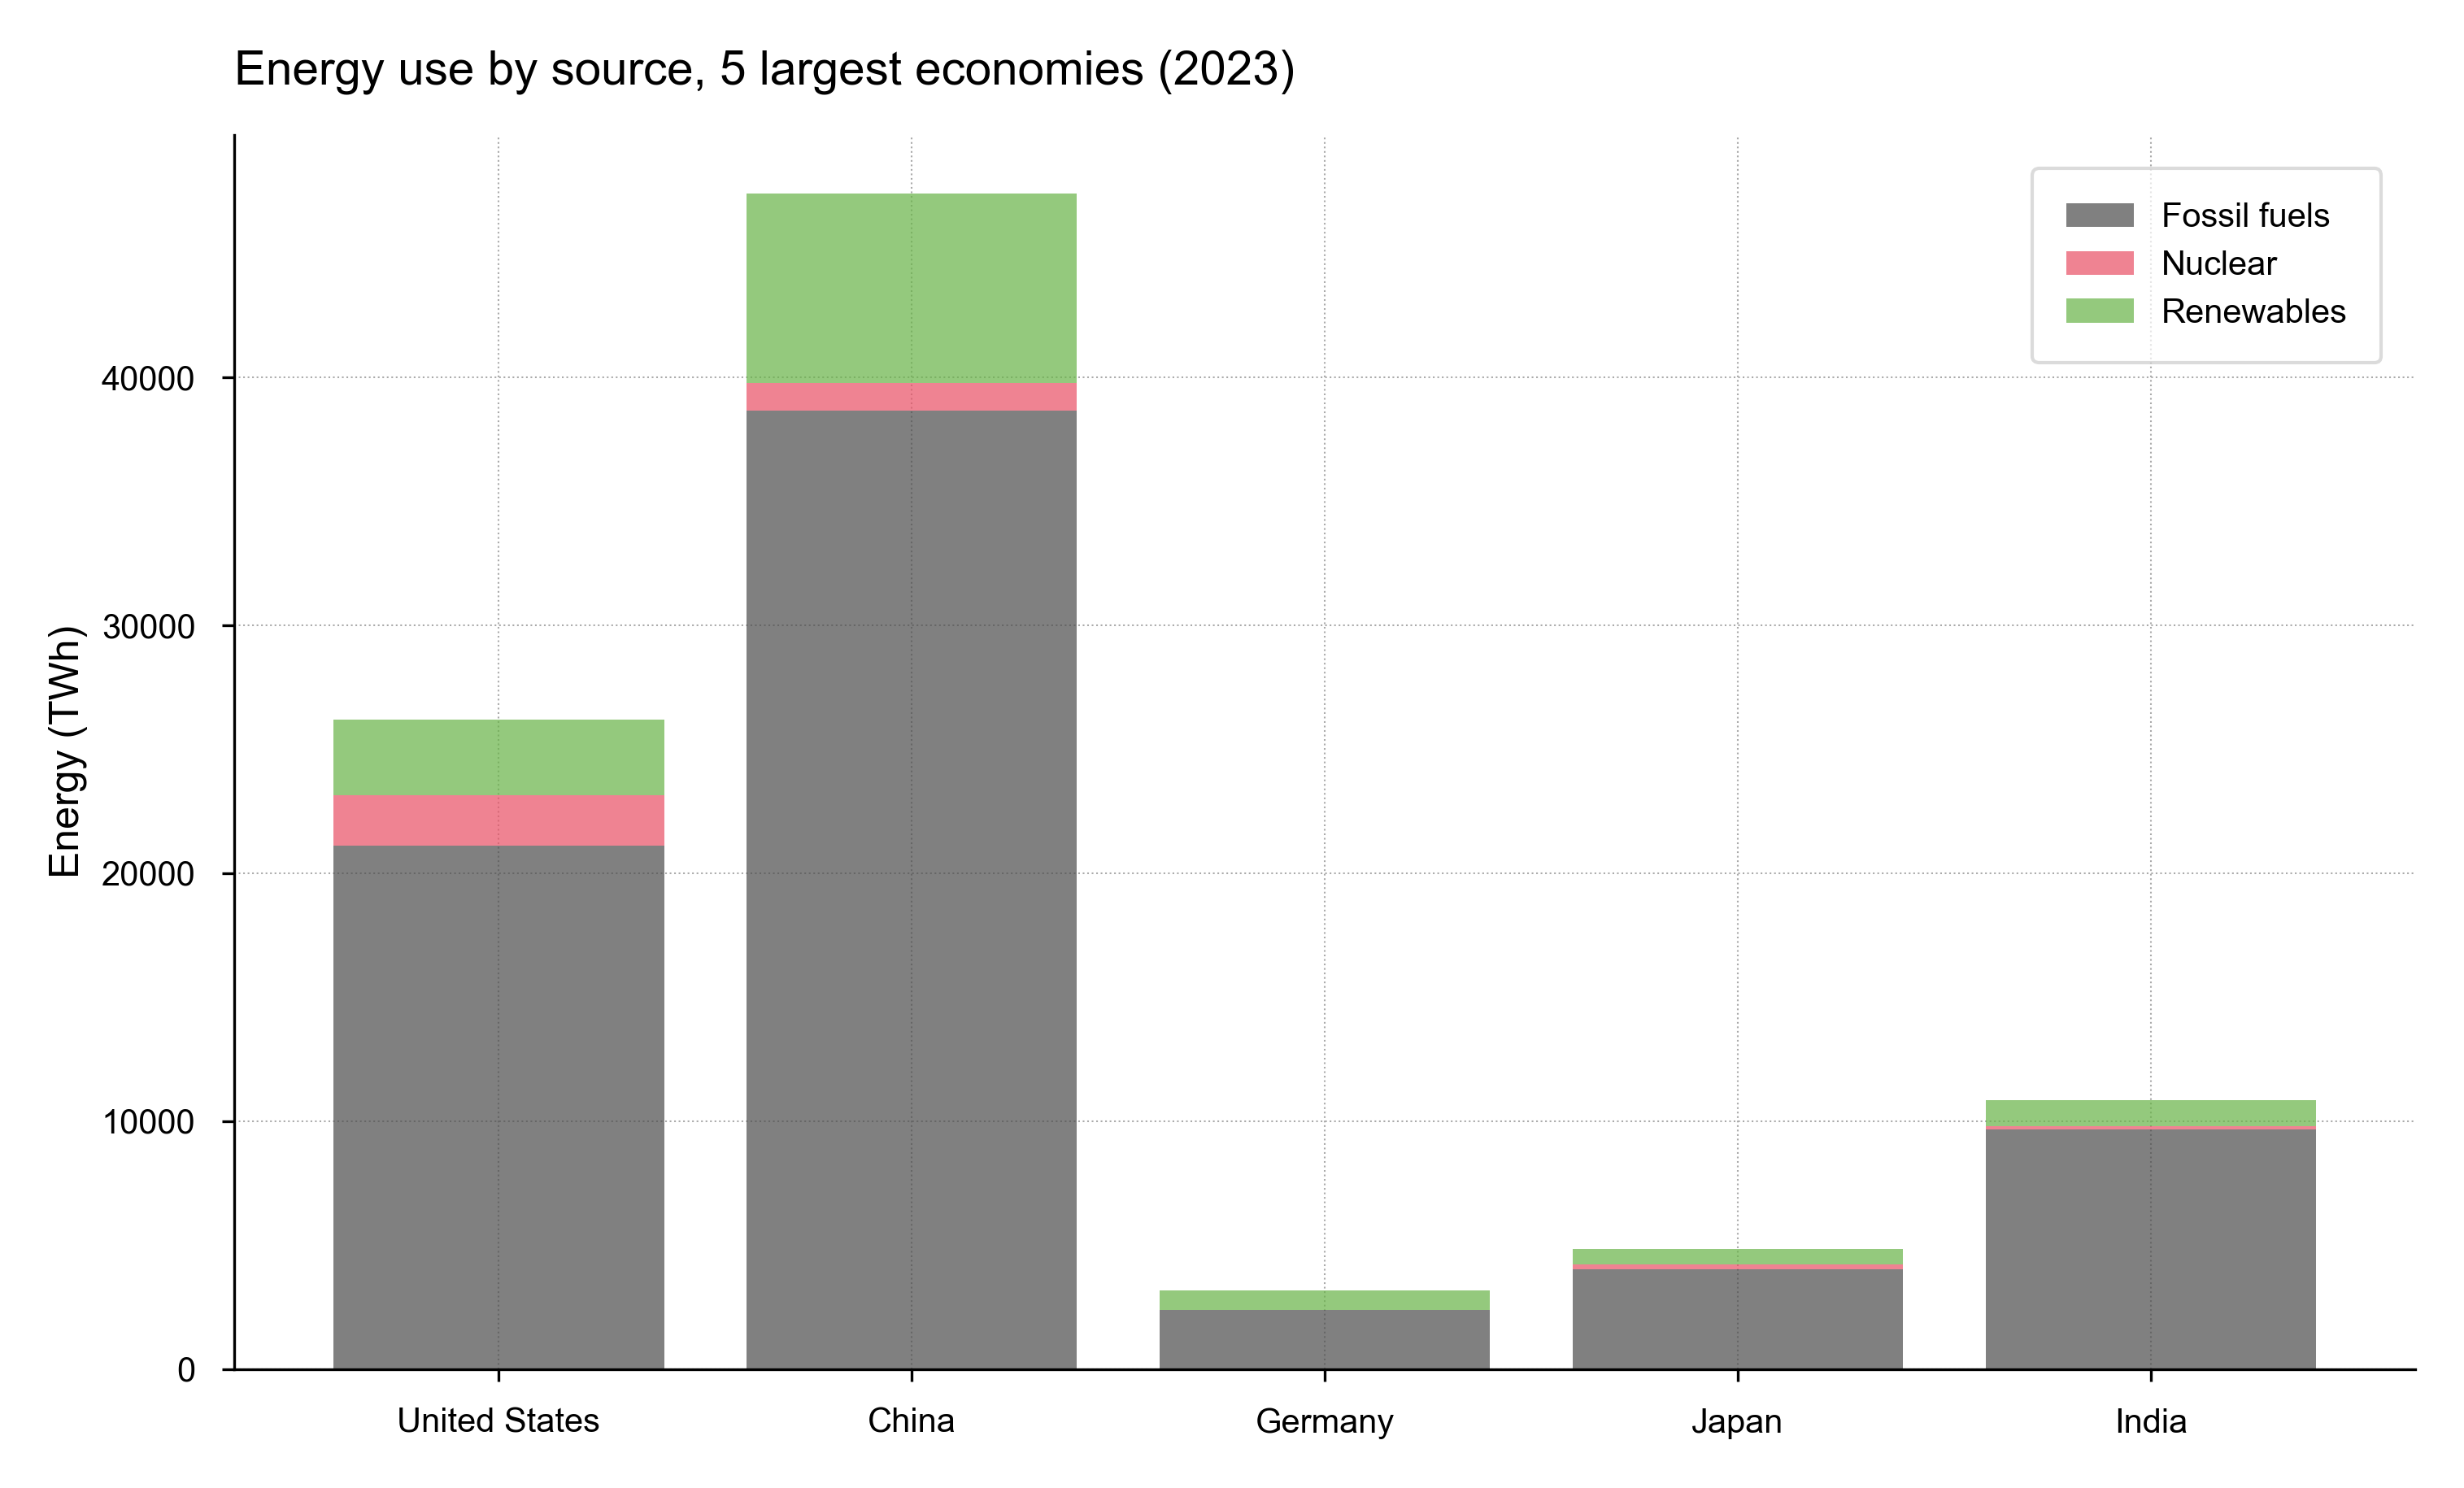

In [27]:
# plt.figure(figsize=(10, 6))

df_2023 = df[df["year"] == 2023]
countries = ["United States", "China", "Germany", "Japan", "India"]
fields = ["fossil_fuel_consumption", "nuclear_consumption", "renewables_consumption"]
field_labels = ["Fossil fuels", "Nuclear", "Renewables"]

formatted_data = []
for field in fields:
    country_data = []
    for country in countries:
        country_data.append(df_2023[df_2023["country"] == country][field].values[0])
    formatted_data.append(country_data)

# print(formatted_data)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_axisbelow(True)

bottom = np.zeros(len(countries))
for i, subcategory_data in enumerate(formatted_data):
    ax.bar(countries, subcategory_data, bottom=bottom, label=field_labels[i], alpha=0.7)
    bottom += subcategory_data

ax.set_title("Energy use by source, 5 largest economies (2023)", loc="left", fontweight="regular")
ax.set_ylabel("Energy (TWh)")
# ax.set_xlabel("Country")
# ax.legend(loc="upper right")
ax.legend(
    loc="upper right",
    frameon=True,
    # fancybox=True,
    # shadow=True,
    framealpha=0.7,
    borderpad=1,
)

plt.savefig("../../joypauls.dev-astro/src/assets/blog/energy-use-in-us/energy_use_country_2023.png")
plt.show()

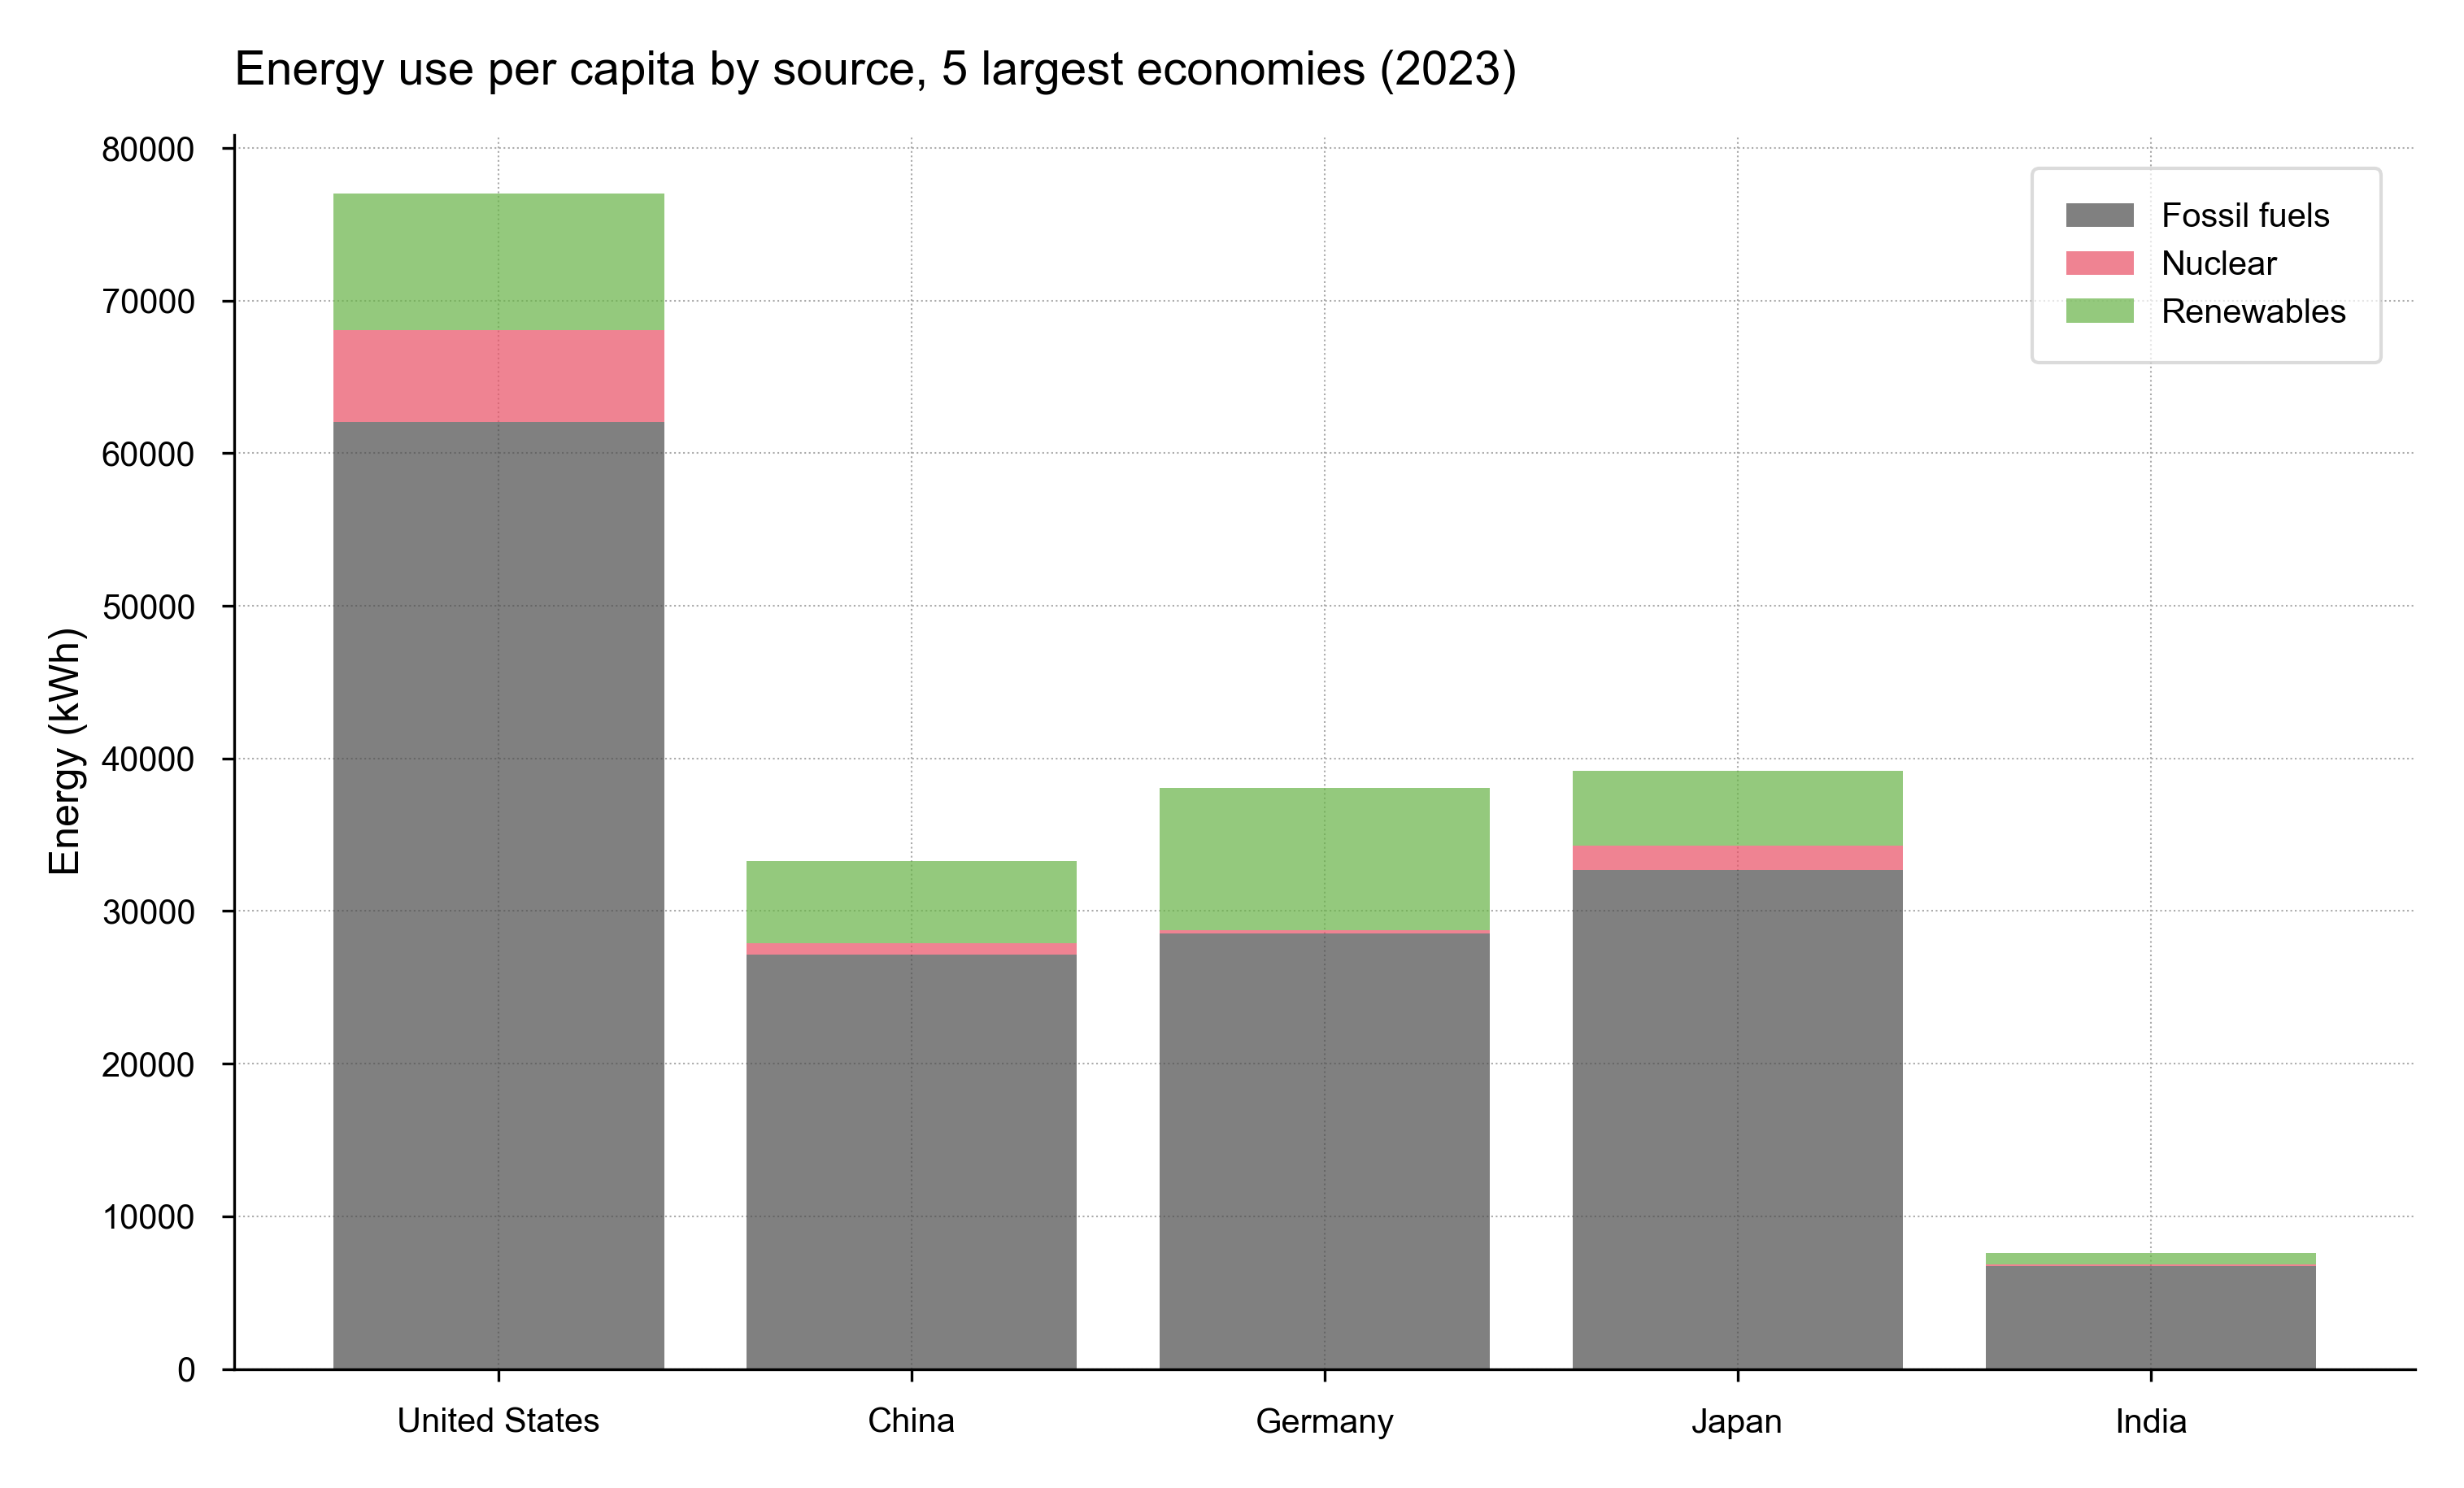

In [ ]:
# plt.figure(figsize=(10, 6))

df_2023 = df[df["year"] == 2023]
countries = ["United States", "China", "Germany", "Japan", "India"]
fields = ["fossil_energy_per_capita", "nuclear_energy_per_capita", "renewables_energy_per_capita"]
field_labels = ["Fossil fuels", "Nuclear", "Renewables"]

formatted_data = []
for field in fields:
    country_data = []
    for country in countries:
        country_data.append(df_2023[df_2023["country"] == country][field].values[0])
    formatted_data.append(country_data)

# print(formatted_data)

fig, ax = plt.subplots(figsize=(10, 6))
# fig.subplots_adjust(left=0.8, right=0.95, top=0.9, bottom=0.15)
ax.set_axisbelow(True)

bottom = np.zeros(len(countries))
for i, subcategory_data in enumerate(formatted_data):
    ax.bar(countries, subcategory_data, bottom=bottom, label=field_labels[i], alpha=0.7)
    bottom += subcategory_data

ax.set_title("Energy use per capita by source, 5 largest economies (2023)", loc="left", fontweight="regular")
ax.set_ylabel("Energy (kWh)")
ax.legend(
    loc="upper right",
    frameon=True,
    # fancybox=True,
    # shadow=True,
    framealpha=0.7,
    borderpad=1,
)

plt.savefig("../../joypauls.dev-astro/src/assets/blog/energy-use-in-us/energy_use_country_capita_2023.png")
plt.show()

Calculations

In [735]:
# us percent of world energy consumption

df_2023 = df[df["year"] == 2023]
print(df_2023[df_2023["country"] == "United States"]["primary_energy_consumption"].values[0] / df_2023[df_2023["country"] == "World"]["primary_energy_consumption"].values[0])
print(df_2023[df_2023["country"] == "United States"]["population"].values[0] / df_2023[df_2023["country"] == "World"]["population"].values[0])


0.15215745830639027
0.04226021285902013


In [759]:
# us: percent of total energy consumption 1970

df_1970 = df[df["year"] == 1970]
# print(df_1970[df_1970["country"] == "United States"]["renewables_consumption"].values[0] / df_1970[df_1970["country"] == "United States"]["primary_energy_consumption"].values[0])


fields = [
    "fossil_fuel_consumption",
    "nuclear_consumption",
    "renewables_consumption",
    "oil_consumption",
    "coal_consumption",
    "gas_consumption",
]
for field in fields:
    print(field)
    print(df_1970[df_1970["country"] == "United States"][field].values[0] / df_1970[df_1970["country"] == "United States"]["primary_energy_consumption"].values[0])


fossil_fuel_consumption
0.9524146098175091
nuclear_consumption
0.0035772587257715104
renewables_consumption
0.04400802160185962
oil_consumption
0.4490971578350683
coal_consumption
0.18755844278539194
gas_consumption
0.31575900919704886


In [760]:
# us: percent of total energy consumption 2023

df_2023 = df[df["year"] == 2023]
# print(df_1970[df_1970["country"] == "United States"]["renewables_consumption"].values[0] / df_1970[df_1970["country"] == "United States"]["primary_energy_consumption"].values[0])

fields = [
    "fossil_fuel_consumption",
    "nuclear_consumption",
    "renewables_consumption",
    "oil_consumption",
    "coal_consumption",
    "gas_consumption",
]
for field in fields:
    print(field)
    print(df_2023[df_2023["country"] == "United States"][field].values[0] / df_2023[df_2023["country"] == "United States"]["primary_energy_consumption"].values[0])


fossil_fuel_consumption
0.8057597714233261
nuclear_consumption
0.07768217729759509
renewables_consumption
0.11655808946275906
oil_consumption
0.3803347326506626
coal_consumption
0.08693919962958775
gas_consumption
0.3384858009593955


In [23]:
# us: percent of total electricity generated 2000

df_2023 = df[df["year"] == 2000]
# print(df_1970[df_1970["country"] == "United States"]["renewables_consumption"].values[0] / df_1970[df_1970["country"] == "United States"]["primary_energy_consumption"].values[0])

fields = [
    "fossil_share_elec",
    "nuclear_share_elec",
    "renewables_share_elec",
    # "oil_consumption",
    # "coal_consumption",
    # "gas_consumption",
]
for field in fields:
    print(field)
    print(df_2023[df_2023["country"] == "United States"][field].values[0])

fossil_share_elec
70.942
nuclear_share_elec
19.828
renewables_share_elec
9.23


In [22]:
# us: percent of total electricity generated 2023

df_2023 = df[df["year"] == 2023]
# print(df_1970[df_1970["country"] == "United States"]["renewables_consumption"].values[0] / df_1970[df_1970["country"] == "United States"]["primary_energy_consumption"].values[0])

fields = [
    "fossil_share_elec",
    "nuclear_share_elec",
    "renewables_share_elec",
    # "oil_consumption",
    # "coal_consumption",
    # "gas_consumption",
]
for field in fields:
    print(field)
    print(df_2023[df_2023["country"] == "United States"][field].values[0])

fossil_share_elec
59.08
nuclear_share_elec
18.248
renewables_share_elec
22.673


In [24]:
# china: percent of total electricity generated 2023

df_2023 = df[df["year"] == 2023]
# print(df_1970[df_1970["country"] == "United States"]["renewables_consumption"].values[0] / df_1970[df_1970["country"] == "United States"]["primary_energy_consumption"].values[0])

fields = [
    "fossil_share_elec",
    "nuclear_share_elec",
    "renewables_share_elec",
    # "oil_consumption",
    # "coal_consumption",
    # "gas_consumption",
]
for field in fields:
    print(field)
    print(df_2023[df_2023["country"] == "China"][field].values[0])

fossil_share_elec
64.724
nuclear_share_elec
4.596
renewables_share_elec
30.68


In [26]:
# population comparison 2023

df_2023 = df[df["year"] == 2023]
# print(df_1970[df_1970["country"] == "United States"]["renewables_consumption"].values[0] / df_1970[df_1970["country"] == "United States"]["primary_energy_consumption"].values[0])

print(df_2023[df_2023["country"] == "United States"]["population"].values[0])
print(df_2023[df_2023["country"] == "China"]["population"].values[0])
print(df_2023[df_2023["country"] == "China"]["population"].values[0] / df_2023[df_2023["country"] == "United States"]["population"].values[0])

339996576.0
1425671296.0
4.1931930985093215
